In [2]:
import numpy as np    
import matplotlib.pyplot as plt
import os
import math
import json

In [3]:
path = '/Users/nicolemeister/Desktop/STANFORD/tatsu_rotation/'

# 3/8

In [241]:
with open(path+'/crfm_results/summarization/003/strong_enforce_certainty/triviaQA_eval_combined.json', 'r') as f:
  data = json.load(f)


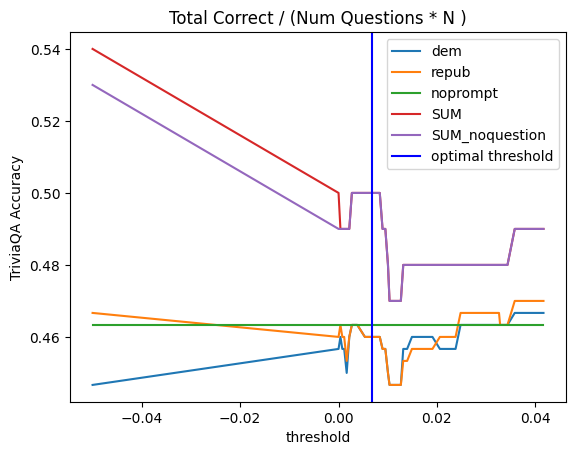

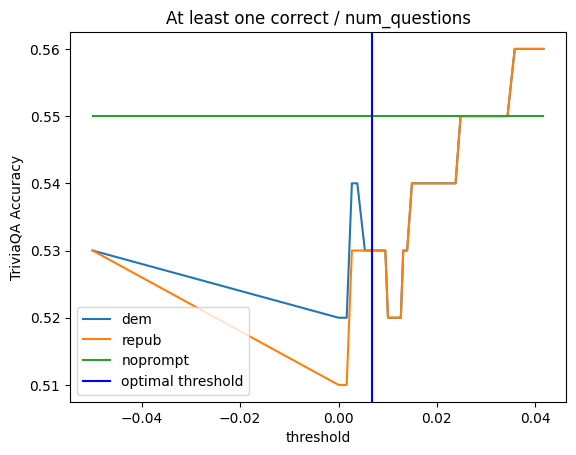

In [246]:
results_total_correct = {'dem': [], 'repub': [], 'noprompt': [], 'SUM': [], 'SUM_noquestion': []}
results_atleastone_correct = {'dem': [], 'repub': [], 'noprompt': []}
thresholds=list(data.keys())[1:]
optimal_t = 0.0069
for t in thresholds:
    for prompt_type in results_total_correct.keys():
        results_total_correct[prompt_type].append(data[t][prompt_type]['total_correct_%'])
        
for t in thresholds:
    for prompt_type in results_atleastone_correct.keys():
        results_atleastone_correct[prompt_type].append(data[t][prompt_type]['atleastone_correct_%'])
    
thresholds = []
for t in list(data.keys())[1:]:
    thresholds.append(float(t))

for prompt_type in results_total_correct.keys():
    plt.plot(thresholds, results_total_correct[prompt_type], label=prompt_type)
plt.axvline(x = optimal_t, color = 'b', label = 'optimal threshold')

plt.legend()
plt.title('Total Correct / (Num Questions * N )')
plt.xlabel("threshold")
plt.ylabel('TriviaQA Accuracy')
plt.show()

for prompt_type in results_atleastone_correct.keys():
    plt.plot(thresholds, results_atleastone_correct[prompt_type], label=prompt_type)
plt.axvline(x = optimal_t, color = 'b', label = 'optimal threshold')

plt.legend()
plt.title('At least one correct / num_questions')
plt.xlabel("threshold")
plt.ylabel('TriviaQA Accuracy')
plt.show()

In [239]:
with open(path+'/crfm_results/summarization/002/strong/triviaQA_eval_combined.json', 'r') as f:
  data = json.load(f)

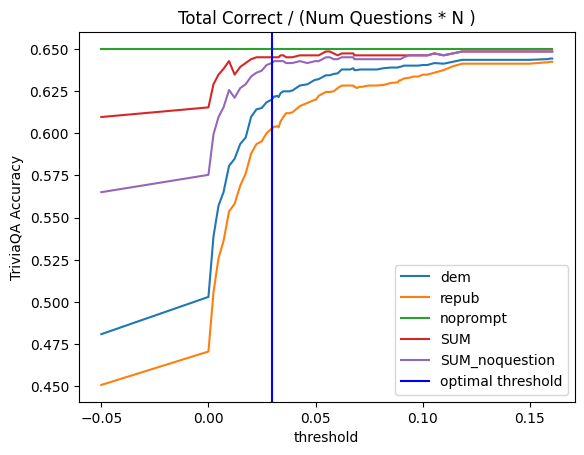

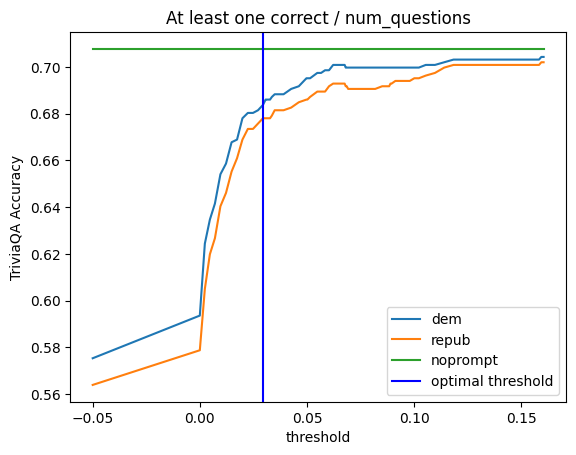

In [240]:
results_total_correct = {'dem': [], 'repub': [], 'noprompt': [], 'SUM': [], 'SUM_noquestion': []}
results_atleastone_correct = {'dem': [], 'repub': [], 'noprompt': []}
thresholds=list(data.keys())
optimal_t = 0.029479009218468712
for t in thresholds:
    for prompt_type in results_total_correct.keys():
        results_total_correct[prompt_type].append(data[t][prompt_type]['total_correct_%'])
        
for t in thresholds:
    for prompt_type in results_atleastone_correct.keys():
        results_atleastone_correct[prompt_type].append(data[t][prompt_type]['atleastone_correct_%'])
    
thresholds = []
for t in list(data.keys()):
    thresholds.append(float(t))

for prompt_type in results_total_correct.keys():
    plt.plot(thresholds, results_total_correct[prompt_type], label=prompt_type)
plt.axvline(x = optimal_t, color = 'b', label = 'optimal threshold')

plt.legend()
plt.title('Total Correct / (Num Questions * N )')
plt.xlabel("threshold")
plt.ylabel('TriviaQA Accuracy')
plt.show()

for prompt_type in results_atleastone_correct.keys():
    plt.plot(thresholds, results_atleastone_correct[prompt_type], label=prompt_type)
plt.axvline(x = optimal_t, color = 'b', label = 'optimal threshold')

plt.legend()
plt.title('At least one correct / num_questions')
plt.xlabel("threshold")
plt.ylabel('TriviaQA Accuracy')
plt.show()



# 3/6

In [63]:
with open(path+'/crfm_results/summarization/002/strong/polarizingqs/temp_0.5/subjective_informative.json', 'r') as f:
  small_002 = json.load(f)

with open(path+'/crfm_results/summarization/003/strong/polarizingqs/temp_0.5/subjective_informative.json', 'r') as f:
  small_003 = json.load(f)

with open(path+'/crfm_results/summarization/002/strong/polarizingqs_large/temp_0.5/subjective_informative.json', 'r') as f:
  large_002 = json.load(f)

with open(path+'/crfm_results/summarization/003/strong/polarizingqs_large/temp_0.5/subjective_informative.json', 'r') as f:
  large_003 = json.load(f)

# combine large and small
small_003.update(large_003)
small_002.update(large_002)

In [64]:
args= {'model_num': X, 'prompt_strength': X, 'temp': X, 'N': X}

# python subjective_information_tradeoff.py --question_type polarizingqs_large --temp 0.5 --model_num 3
# python subjective_information_tradeoff.py --question_type polarizingqs --temp 0.5 --model_num 3
# python subjective_information_tradeoff.py --question_type polarizingqs_large --temp 0.5 --model_num 2
# python subjective_information_tradeoff.py --question_type polarizingqs --temp 0.5 --model_num 2


NameError: name 'X' is not defined

In [65]:
def get_data(answers, polarizing_qs, nonpolarizing_qs):
    dem_s, repub_s, noprompt_s, SUM_s, SUM_noquestion_s, SUM_tatsu_s = [], [], [], [], [], []
    dem_i, repub_i, noprompt_i, SUM_i, SUM_noquestion_i, SUM_tatsu_i = [], [], [], [], [], []
    for question in polarizing_qs: 
        answers_informative = answers[question]['answers_informative']
        answers_subjective = answers[question]['answers_subjective']
        
        dem_i+=list(map(int, answers_informative[:3]))
        repub_i+=list(map(int, answers_informative[3:6]))
        noprompt_i+=list(map(int, answers_informative[6:9]))
        SUM_i.append(int(answers_informative[9]))
        SUM_noquestion_i.append(int(answers_informative[10]))
        SUM_tatsu_i.append(int(answers_informative[11]))

        dem_s+=list(map(int, answers_subjective[:3]))
        repub_s+=list(map(int, answers_subjective[3:6]))
        noprompt_s+=list(map(int, answers_subjective[6:9]))
        SUM_s.append(int(answers_subjective[9]))
        SUM_noquestion_s.append(int(answers_subjective[10]))
        SUM_tatsu_s.append(int(answers_subjective[11]))

    for question in nonpolarizing_qs: 
        answers_informative = answers[question]['answers_informative']
        answers_subjective = answers[question]['answers_subjective']
        
        dem_i+=list(map(int, answers_informative[6:9]))
        repub_i+=list(map(int, answers_informative[6:9]))
        noprompt_i+=list(map(int, answers_informative[6:9]))
        SUM_i.append(int(answers_informative[6]))
        SUM_noquestion_i.append(int(answers_informative[6]))
        SUM_tatsu_i.append(int(answers_informative[6]))

        dem_s+=list(map(int, answers_subjective[6:9]))
        repub_s+=list(map(int, answers_subjective[6:9]))
        noprompt_s+=list(map(int, answers_subjective[6:9]))
        SUM_s.append(int(answers_subjective[6]))
        SUM_noquestion_s.append(int(answers_subjective[6]))
        SUM_tatsu_s.append(int(answers_subjective[6]))
    
    return dem_i, repub_i, noprompt_i, SUM_i, SUM_noquestion_i, SUM_tatsu_i, dem_s, repub_s, noprompt_s, SUM_s, SUM_noquestion_s, SUM_tatsu_s

In [66]:
from helm.thresholding import optimal_threshold
from collections import defaultdict

labels = ['SUM', 'SUM_noquestion', 'SUM_tatsu', 'dem', 'noprompt', 'repub']



def get_mean_subj_info(args):
    if args['model_num']==3:
        path_triviaQA = '/Users/nicolemeister/Desktop/STANFORD/tatsu_rotation/crfm_results/summarization/00{}/{}/triviaQA/temp_{}/'.format('2', args['prompt_strength'], args['temp'])
        path_triviaQAmini = '/Users/nicolemeister/Desktop/STANFORD/tatsu_rotation/crfm_results/summarization/00{}/{}/triviaQAmini/temp_{}/'.format('2', args['prompt_strength'], args['temp'])
    
    else: 
        path_triviaQA = '/Users/nicolemeister/Desktop/STANFORD/tatsu_rotation/crfm_results/summarization/00{}/{}/triviaQA/temp_{}/'.format(args['model_num'], args['prompt_strength'], args['temp'])
        path_triviaQAmini = '/Users/nicolemeister/Desktop/STANFORD/tatsu_rotation/crfm_results/summarization/00{}/{}/triviaQAmini/temp_{}/'.format(args['model_num'], args['prompt_strength'], args['temp'])
    path_polarizingqs = '/Users/nicolemeister/Desktop/STANFORD/tatsu_rotation/crfm_results/summarization/00{}/{}/polarizingqs/temp_{}/'.format(args['model_num'], args['prompt_strength'], args['temp'])
    path_polarizingqs_large = '/Users/nicolemeister/Desktop/STANFORD/tatsu_rotation/crfm_results/summarization/00{}/{}/polarizingqs_large/temp_{}/'.format(args['model_num'], args['prompt_strength'], args['temp'])

    triviaQAmini_scores_path=path_triviaQAmini+"score_N_{}.json".format(args['N'])
    triviaQA_scores_path=path_triviaQA+"score_N_{}.json".format(args['N'])
    polarizingqs_scores_path=path_polarizingqs+"score_N_{}.json".format(args['N'])
    polarizingqs_large_scores_path=path_polarizingqs_large+"score_N_{}.json".format(args['N'])

    optimal_t, trivia_offdiaggap_polarizing, trivia_offdiaggap_polarizing_dict = optimal_threshold(polarizingqs_scores_path, polarizingqs_large_scores_path, triviaQAmini_scores_path, triviaQA_scores_path)
    thresholds = [-0.05]
    for i in np.linspace(0, 75, 76):
        thresholds.append(np.percentile(trivia_offdiaggap_polarizing, i))

    t_to_SI = defaultdict(dict)
    for t in thresholds:
        # based on threshold, get list of polarizing qs
        polarizing_qs, nonpolarizing_qs = [], []
        for q in trivia_offdiaggap_polarizing_dict.keys():
            agreement_score = trivia_offdiaggap_polarizing_dict[q]
            if agreement_score >= t: 
                polarizing_qs.append(q)
            else: 
                nonpolarizing_qs.append(q)
        
        # map threshold to mean (subjective rating, info rating)
        dem_i, repub_i, noprompt_i, SUM_i, SUM_noquestion_i, SUM_tatsu_i, dem_s, repub_s, noprompt_s, SUM_s, SUM_noquestion_s, SUM_tatsu_s = get_data(small_002, polarizing_qs, nonpolarizing_qs)
        t_to_SI[t]['dem'] = [np.mean(dem_i), np.mean(dem_s)]
        t_to_SI[t]['repub'] = [np.mean(repub_i), np.mean(repub_s)]
        t_to_SI[t]['noprompt'] = [np.mean(noprompt_i), np.mean(noprompt_s)]
        t_to_SI[t]['SUM'] = [np.mean(SUM_i), np.mean(SUM_s)]
        t_to_SI[t]['SUM_noquestion'] = [np.mean(SUM_noquestion_i), np.mean(SUM_noquestion_s)]
        t_to_SI[t]['SUM_tatsu'] = [np.mean(SUM_tatsu_i), np.mean(SUM_tatsu_s)]

    return t_to_SI, optimal_t


In [67]:
args_002= {'model_num': 2, 'prompt_strength': 'strong', 'temp': 0.5, 'N': 3}
args_003= {'model_num': 3, 'prompt_strength': 'strong', 'temp': 0.5, 'N': 3}

t_to_SI_002, optimal_t_002 = get_mean_subj_info(args_002)
t_to_SI_003, optimal_t_003 = get_mean_subj_info(args_003)


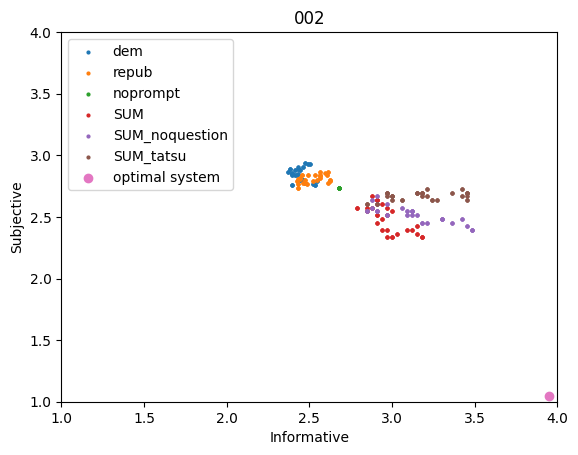

In [68]:
for label in t_to_SI_002[-0.05].keys():
    x, y = [], []
    for t in t_to_SI_002.keys():
        if t_to_SI_002[t]:
            x.append(t_to_SI_002[t][label][0])
            y.append(t_to_SI_002[t][label][1])
    plt.scatter(x,y, s=4, label=label)
plt.scatter(x=3.95, y=1.05, label='optimal system')
plt.legend()
plt.xlabel('Informative')
plt.ylabel('Subjective')
plt.title("002")
plt.xlim([1, 4])
plt.ylim([1, 4])
plt.show()

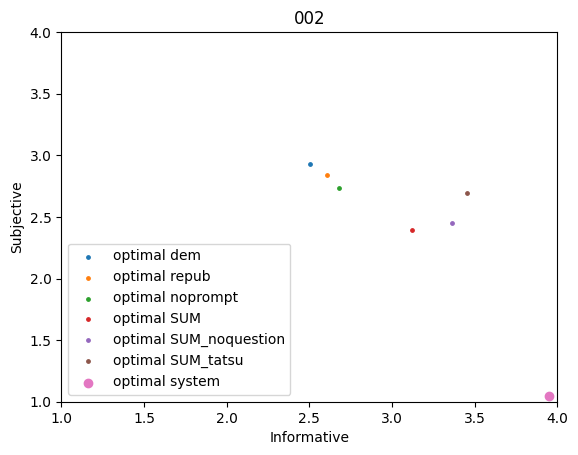

In [69]:
for label in t_to_SI_002[-0.05].keys():
    plt.scatter(x=t_to_SI_002[optimal_t_002][label][0], y=t_to_SI_002[optimal_t_002][label][1], s=6, label="optimal " +label)

plt.scatter(x=3.95, y=1.05, label='optimal system')
plt.legend(loc='lower left')
plt.xlabel('Informative')
plt.ylabel('Subjective')
plt.title("002")
plt.xlim([1, 4])
plt.ylim([1, 4])
plt.show()

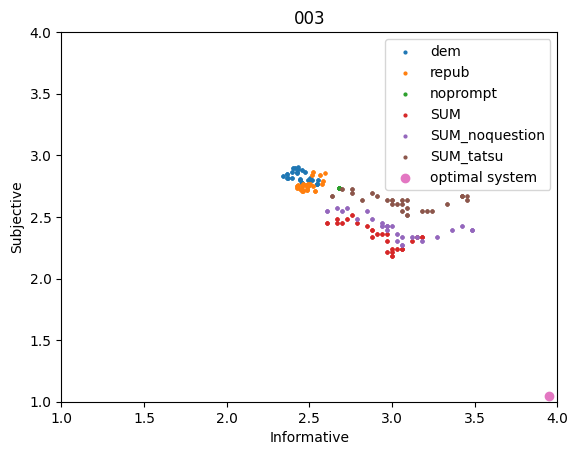

In [70]:
for label in t_to_SI_003[-0.05].keys():
    x, y = [], []
    for t in t_to_SI_003.keys():
        if t_to_SI_003[t]:
            x.append(t_to_SI_003[t][label][0])
            y.append(t_to_SI_003[t][label][1])
    plt.scatter(x,y, s=4, label=label)

plt.scatter(x=3.95, y=1.05, label='optimal system')
plt.legend()
plt.xlabel('Informative')
plt.ylabel('Subjective')
plt.title("003")
plt.xlim([1, 4])
plt.ylim([1, 4])
plt.show()

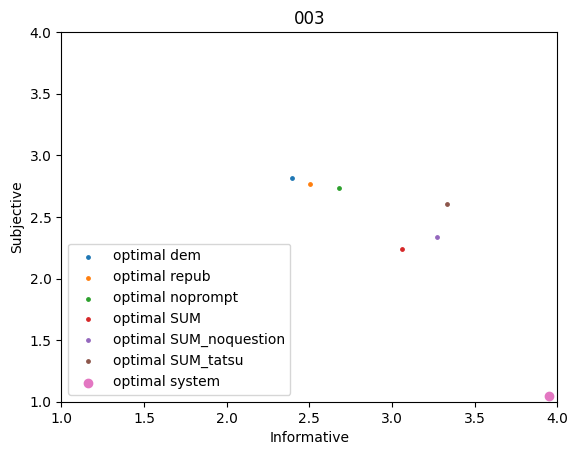

In [72]:
for label in t_to_SI_003[-0.05].keys():
    plt.scatter(x=t_to_SI_003[optimal_t_003][label][0], y=t_to_SI_003[optimal_t_003][label][1], s=6, label="optimal " +label)

plt.scatter(x=3.95, y=1.05, label='optimal system')
plt.legend(loc='lower left')
plt.xlabel('Informative')
plt.ylabel('Subjective')
plt.title("003")
plt.xlim([1, 4])
plt.ylim([1, 4])
plt.show()

In [200]:
labels = ['SUM', 'SUM_noquestion', 'SUM_tatsu', 'dem', 'noprompt', 'repub']
answer_order = ["dem","dem","dem", "repub", "repub", "repub", "noprompt", "noprompt", "noprompt","SUM","SUM_noquestion", "SUM_tatsu"]

In [48]:
def get_data(answers):
    questions = list(answers.keys())
    dem_s, repub_s, noprompt_s, SUM_s, SUM_noquestion_s, SUM_tatsu_s = [], [], [], [], [], []
    dem_i, repub_i, noprompt_i, SUM_i, SUM_noquestion_i, SUM_tatsu_i = [], [], [], [], [], []
    for question in questions: 
        answers_informative = answers[question]['answers_informative']
        answers_subjective = answers[question]['answers_subjective']
        
        dem_i+=list(map(int, answers_informative[:3]))
        repub_i+=list(map(int, answers_informative[3:6]))
        noprompt_i+=list(map(int, answers_informative[6:9]))
        SUM_i.append(int(answers_informative[9]))
        SUM_noquestion_i.append(int(answers_informative[10]))
        SUM_tatsu_i.append(int(answers_informative[11]))

        dem_s+=list(map(int, answers_subjective[:3]))
        repub_s+=list(map(int, answers_subjective[3:6]))
        noprompt_s+=list(map(int, answers_subjective[6:9]))
        SUM_s.append(int(answers_subjective[9]))
        SUM_noquestion_s.append(int(answers_subjective[10]))
        SUM_tatsu_s.append(int(answers_subjective[11]))
    return dem_i, repub_i, noprompt_i, SUM_i, SUM_noquestion_i, SUM_tatsu_i, dem_s, repub_s, noprompt_s, SUM_s, SUM_noquestion_s, SUM_tatsu_s

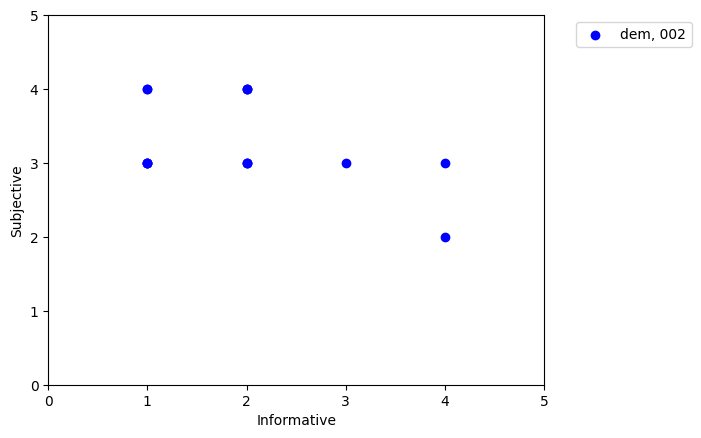

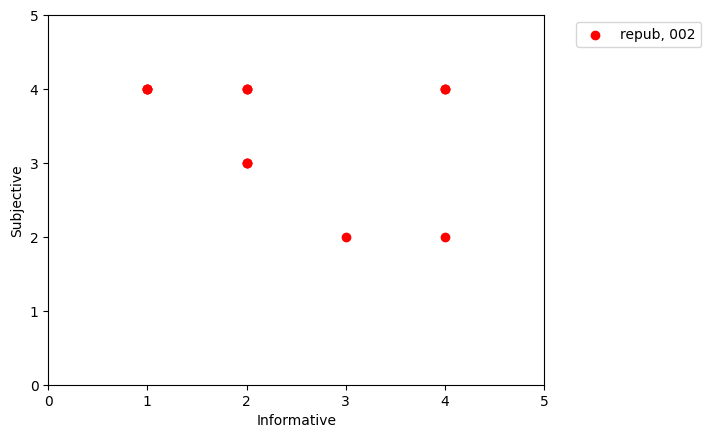

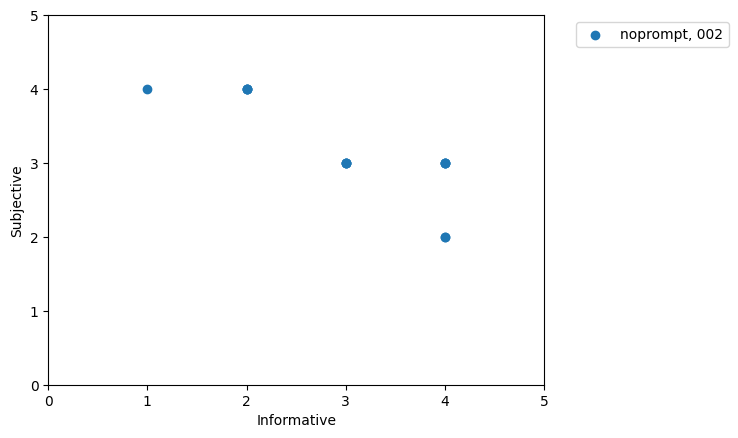

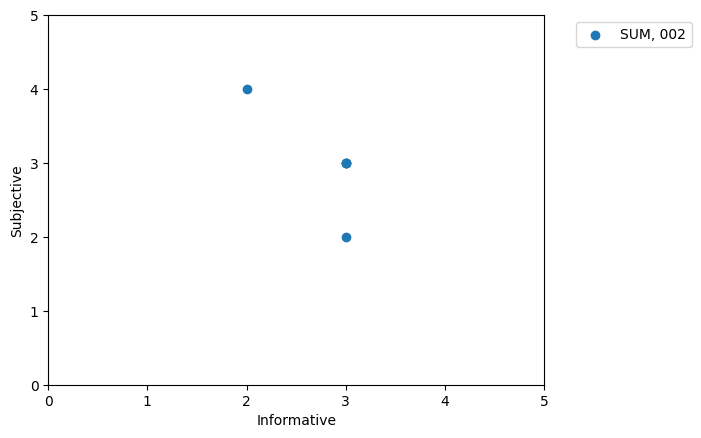

In [49]:
dem_i, repub_i, noprompt_i, SUM_i, SUM_noquestion_i, SUM_tatsu_i, dem_s, repub_s, noprompt_s, SUM_s, SUM_noquestion_s, SUM_tatsu_s=get_data(small_002)
plt.scatter(dem_i, dem_s, color='blue', label='dem, 002')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.xlabel('Informative')
plt.ylabel('Subjective')
plt.xlim([0, 5])
plt.ylim([0, 5])
plt.show()
plt.scatter(repub_i, repub_s, color='red', label='repub, 002')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.xlabel('Informative')
plt.ylabel('Subjective')
plt.xlim([0, 5])
plt.ylim([0, 5])
plt.show()
plt.scatter(noprompt_i, noprompt_s, label='noprompt, 002')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.xlabel('Informative')
plt.ylabel('Subjective')
plt.xlim([0, 5])
plt.ylim([0, 5])
plt.show()
plt.scatter(SUM_i, SUM_s, label='SUM, 002')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.xlabel('Informative')
plt.ylabel('Subjective')
plt.xlim([0, 5])
plt.ylim([0, 5])
plt.show()
# plt.scatter(SUM_noquestion_i, SUM_noquestion_s, label='SUM_noquestion, 002')
# plt.scatter(SUM_tatsu_i, SUM_tatsu_s, label='SUM_tatsu, 002')


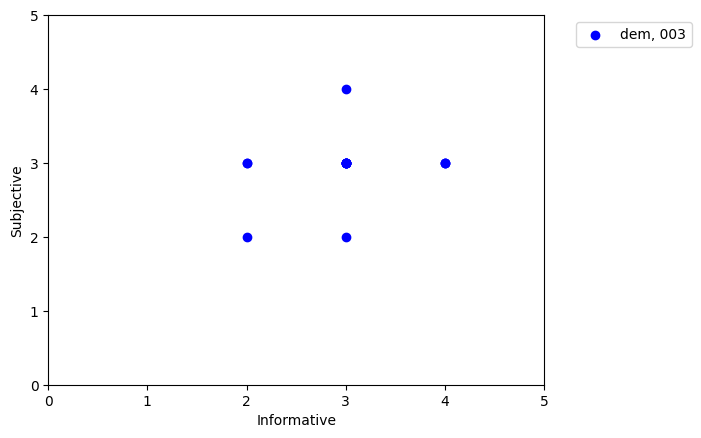

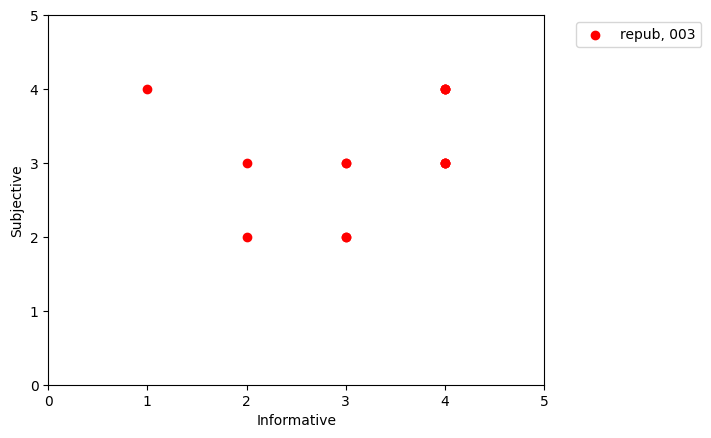

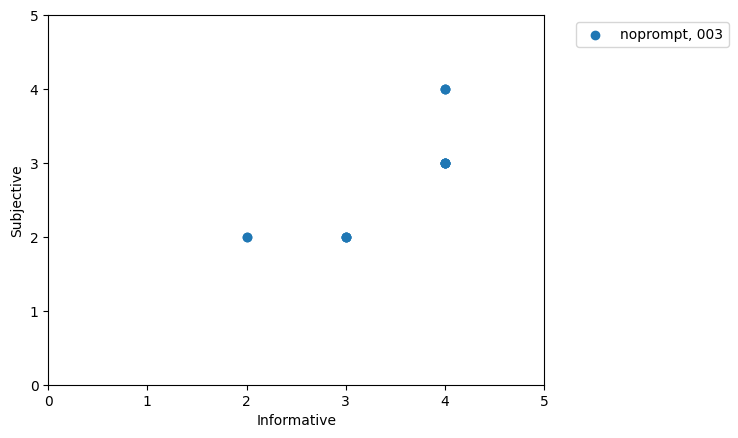

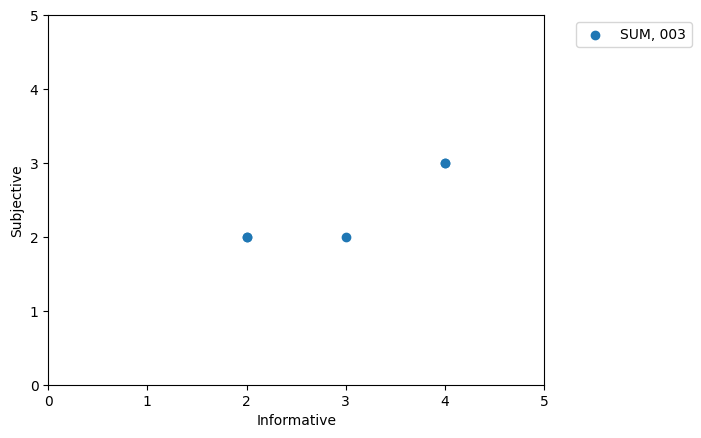

In [50]:
dem_i, repub_i, noprompt_i, SUM_i, SUM_noquestion_i, SUM_tatsu_i, dem_s, repub_s, noprompt_s, SUM_s, SUM_noquestion_s, SUM_tatsu_s=get_data(small_003)
plt.scatter(dem_i, dem_s, color='blue', label='dem, 003')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.xlabel('Informative')
plt.ylabel('Subjective')
plt.xlim([0, 5])
plt.ylim([0, 5])
plt.show()
plt.scatter(repub_i, repub_s, color='red', label='repub, 003')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.xlabel('Informative')
plt.ylabel('Subjective')
plt.xlim([0, 5])
plt.ylim([0, 5])
plt.show()
plt.scatter(noprompt_i, noprompt_s, label='noprompt, 003')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.xlabel('Informative')
plt.ylabel('Subjective')
plt.xlim([0, 5])
plt.ylim([0, 5])
plt.show()
plt.scatter(SUM_i, SUM_s, label='SUM, 003')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.xlabel('Informative')
plt.ylabel('Subjective')
plt.xlim([0, 5])
plt.ylim([0, 5])
plt.show()
# plt.scatter(SUM_noquestion_i, SUM_noquestion_s, label='SUM_noquestion, 002')
# plt.scatter(SUM_tatsu_i, SUM_tatsu_s, label='SUM_tatsu, 002')


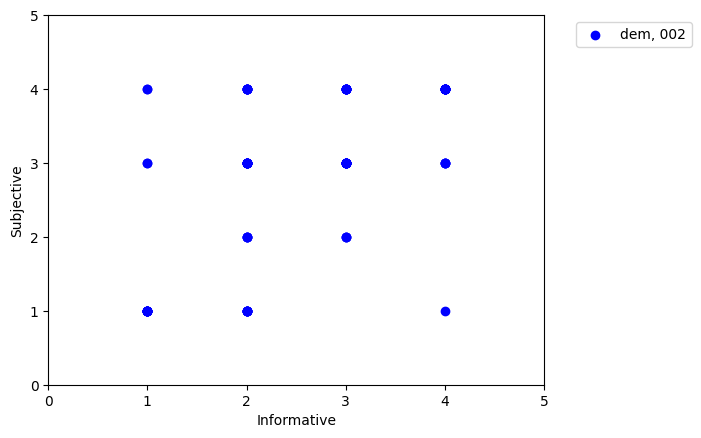

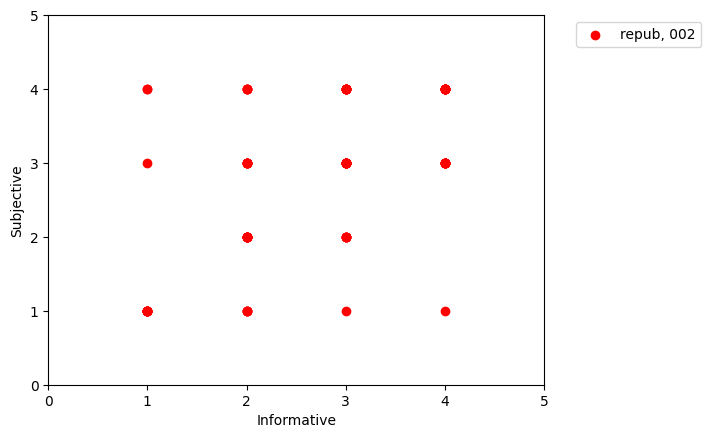

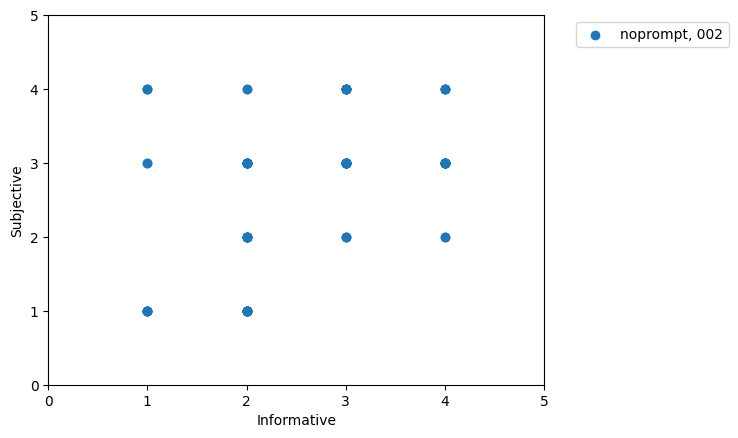

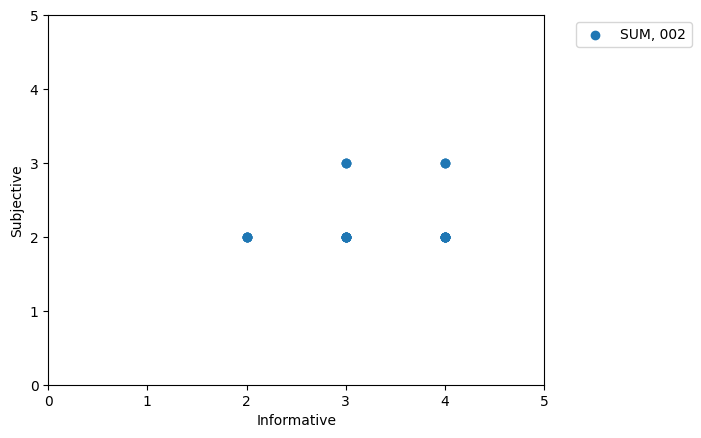

In [51]:
dem_i, repub_i, noprompt_i, SUM_i, SUM_noquestion_i, SUM_tatsu_i, dem_s, repub_s, noprompt_s, SUM_s, SUM_noquestion_s, SUM_tatsu_s=get_data(large_002)
plt.scatter(dem_i, dem_s, color='blue', label='dem, 002')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.xlabel('Informative')
plt.ylabel('Subjective')
plt.xlim([0, 5])
plt.ylim([0, 5])
plt.show()
plt.scatter(repub_i, repub_s, color='red', label='repub, 002')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.xlabel('Informative')
plt.ylabel('Subjective')
plt.xlim([0, 5])
plt.ylim([0, 5])
plt.show()
plt.scatter(noprompt_i, noprompt_s, label='noprompt, 002')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.xlabel('Informative')
plt.ylabel('Subjective')
plt.xlim([0, 5])
plt.ylim([0, 5])
plt.show()
plt.scatter(SUM_i, SUM_s, label='SUM, 002')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.xlabel('Informative')
plt.ylabel('Subjective')
plt.xlim([0, 5])
plt.ylim([0, 5])
plt.show()
# plt.scatter(SUM_noquestion_i, SUM_noquestion_s, label='SUM_noquestion, 002')
# plt.scatter(SUM_tatsu_i, SUM_tatsu_s, label='SUM_tatsu, 002')


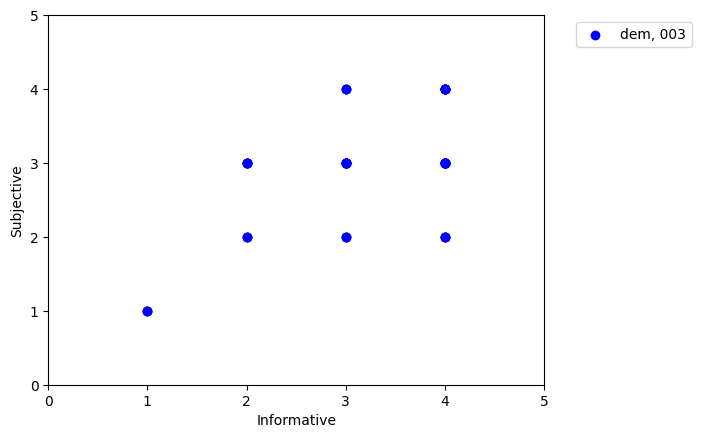

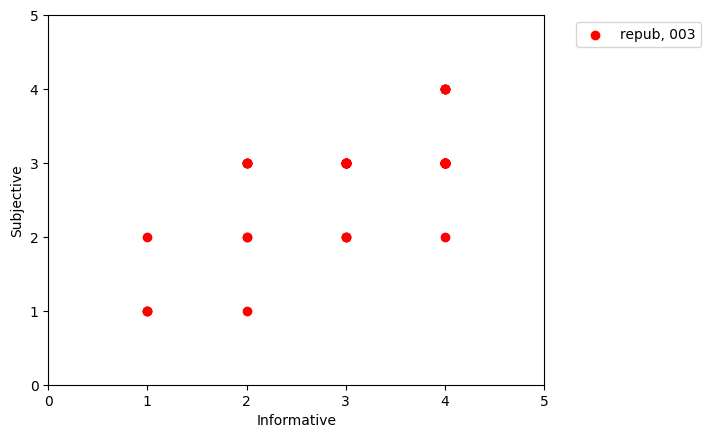

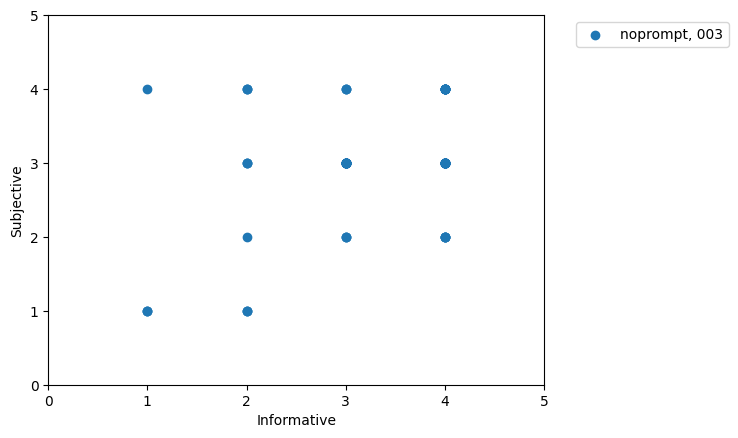

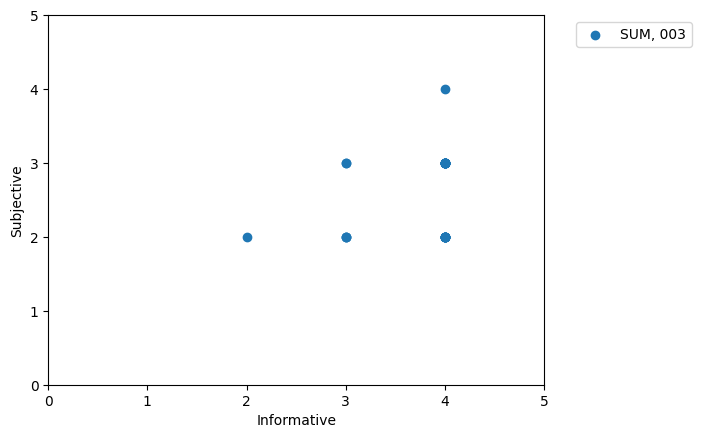

In [52]:
dem_i, repub_i, noprompt_i, SUM_i, SUM_noquestion_i, SUM_tatsu_i, dem_s, repub_s, noprompt_s, SUM_s, SUM_noquestion_s, SUM_tatsu_s=get_data(large_003)
plt.scatter(dem_i, dem_s, color='blue', label='dem, 003')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.xlabel('Informative')
plt.ylabel('Subjective')
plt.xlim([0, 5])
plt.ylim([0, 5])
plt.show()
plt.scatter(repub_i, repub_s, color='red', label='repub, 003')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.xlabel('Informative')
plt.ylabel('Subjective')
plt.xlim([0, 5])
plt.ylim([0, 5])
plt.show()
plt.scatter(noprompt_i, noprompt_s, label='noprompt, 003')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.xlabel('Informative')
plt.ylabel('Subjective')
plt.xlim([0, 5])
plt.ylim([0, 5])
plt.show()
plt.scatter(SUM_i, SUM_s, label='SUM, 003')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.xlabel('Informative')
plt.ylabel('Subjective')
plt.xlim([0, 5])
plt.ylim([0, 5])
plt.show()
# plt.scatter(SUM_noquestion_i, SUM_noquestion_s, label='SUM_noquestion, 002')
# plt.scatter(SUM_tatsu_i, SUM_tatsu_s, label='SUM_tatsu, 002')


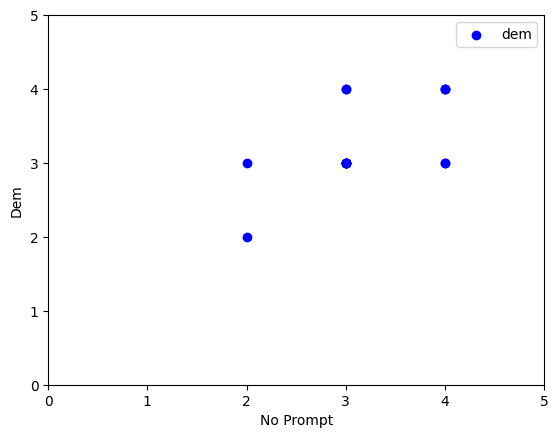

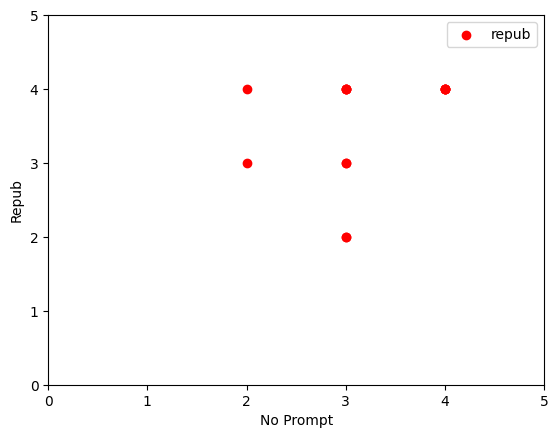

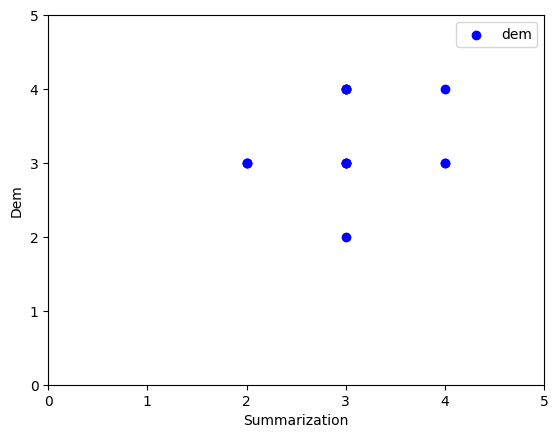

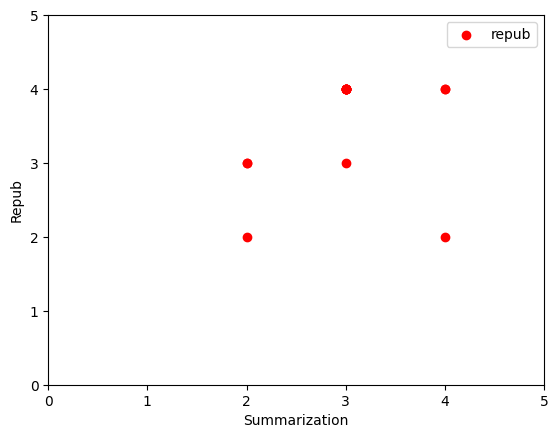

In [53]:
dem_i, repub_i, noprompt_i, SUM_i, SUM_noquestion_i, SUM_tatsu_i, dem_s, repub_s, noprompt_s, SUM_s, SUM_noquestion_s, SUM_tatsu_s=get_data(small_002)
plt.scatter(noprompt_s, dem_s, color='blue', label='dem')
plt.xlabel('No Prompt')
plt.ylabel('Dem')
plt.xlim([0, 5])
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.scatter(noprompt_s, repub_s, color='red', label='repub')
plt.xlabel('No Prompt')
plt.ylabel('Repub')
plt.xlim([0, 5])
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.scatter(np.repeat(SUM_s, 3), dem_s, color='blue', label='dem')
plt.xlabel('Summarization')
plt.ylabel('Dem')
plt.xlim([0, 5])
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.scatter(np.repeat(SUM_s, 3), repub_s, color='red', label='repub')
plt.xlabel('Summarization')
plt.ylabel('Repub')
plt.xlim([0, 5])
plt.ylim([0, 5])
plt.legend()
plt.show()


In [54]:
from scipy import stats

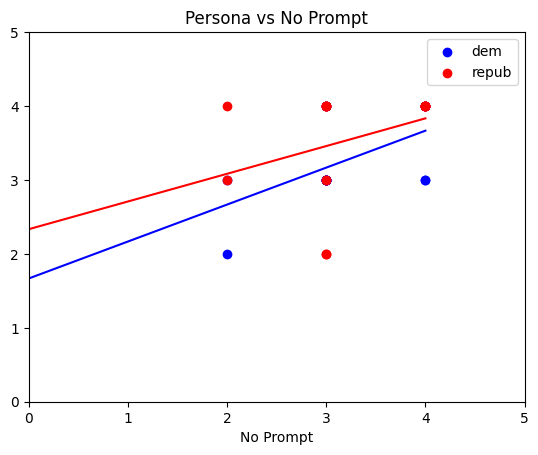

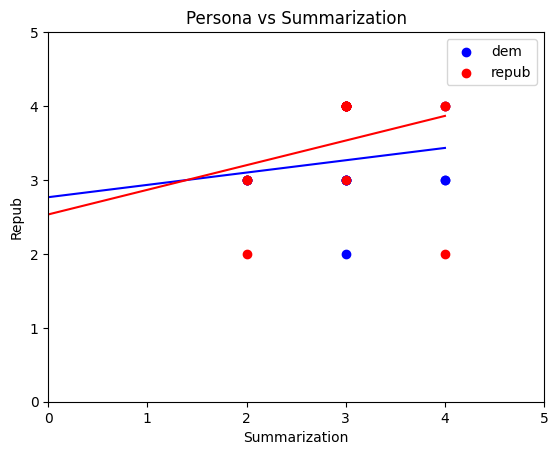

In [55]:
dem_i, repub_i, noprompt_i, SUM_i, SUM_noquestion_i, SUM_tatsu_i, dem_s, repub_s, noprompt_s, SUM_s, SUM_noquestion_s, SUM_tatsu_s=get_data(small_002)
plt.scatter(noprompt_s, dem_s, color='blue', label='dem')
plt.scatter(noprompt_s, repub_s, color='red', label='repub')
x = np.arange(5)
slope, intercept, r_value, p_value, std_err = stats.linregress(noprompt_s,dem_s)
plt.plot(x, slope*x + intercept, 'b-')
slope, intercept, r_value, p_value, std_err = stats.linregress(noprompt_s,repub_s)
plt.plot(x, slope*x + intercept, 'r-')

plt.xlabel('No Prompt')
plt.xlim([0, 5])
plt.ylim([0, 5])
plt.legend()
plt.title("Persona vs No Prompt")
plt.show()

plt.scatter(np.repeat(SUM_s, 3), dem_s, color='blue', label='dem')
plt.scatter(np.repeat(SUM_s, 3), repub_s, color='red', label='repub')

slope, intercept, r_value, p_value, std_err = stats.linregress(np.repeat(SUM_s, 3),dem_s)
plt.plot(x, slope*x + intercept, 'b-')
slope, intercept, r_value, p_value, std_err = stats.linregress(np.repeat(SUM_s, 3),repub_s)
plt.plot(x, slope*x + intercept, 'r-')
plt.xlabel('Summarization')
plt.ylabel('Repub')
plt.xlim([0, 5])
plt.ylim([0, 5])
plt.legend()
plt.title("Persona vs Summarization")
plt.show()


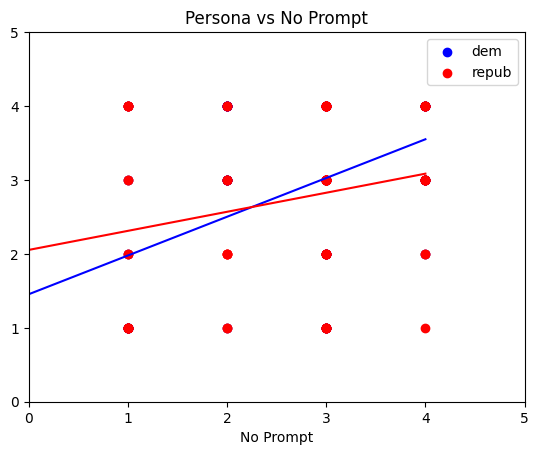

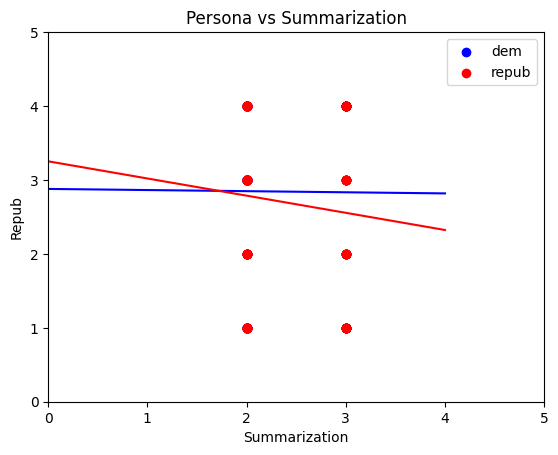

In [56]:
dem_i, repub_i, noprompt_i, SUM_i, SUM_noquestion_i, SUM_tatsu_i, dem_s, repub_s, noprompt_s, SUM_s, SUM_noquestion_s, SUM_tatsu_s=get_data(large_002)
plt.scatter(noprompt_s, dem_s, color='blue', label='dem')
plt.scatter(noprompt_s, repub_s, color='red', label='repub')
x = np.arange(5)
slope, intercept, r_value, p_value, std_err = stats.linregress(noprompt_s,dem_s)
plt.plot(x, slope*x + intercept, 'b-')
slope, intercept, r_value, p_value, std_err = stats.linregress(noprompt_s,repub_s)
plt.plot(x, slope*x + intercept, 'r-')

plt.xlabel('No Prompt')
plt.xlim([0, 5])
plt.ylim([0, 5])
plt.legend()
plt.title("Persona vs No Prompt")
plt.show()

plt.scatter(np.repeat(SUM_s, 3), dem_s, color='blue', label='dem')
plt.scatter(np.repeat(SUM_s, 3), repub_s, color='red', label='repub')

slope, intercept, r_value, p_value, std_err = stats.linregress(np.repeat(SUM_s, 3),dem_s)
plt.plot(x, slope*x + intercept, 'b-')
slope, intercept, r_value, p_value, std_err = stats.linregress(np.repeat(SUM_s, 3),repub_s)
plt.plot(x, slope*x + intercept, 'r-')
plt.xlabel('Summarization')
plt.ylabel('Repub')
plt.xlim([0, 5])
plt.ylim([0, 5])
plt.legend()
plt.title("Persona vs Summarization")
plt.show()


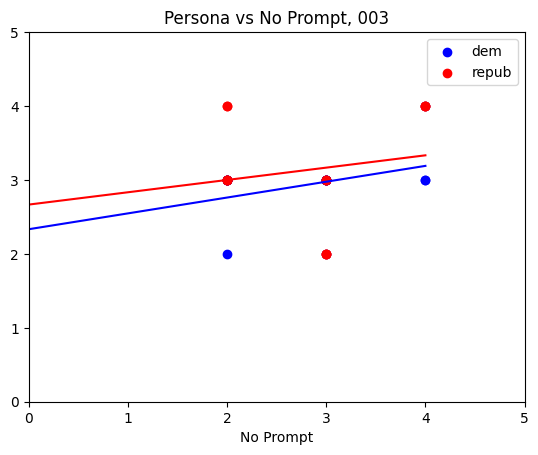

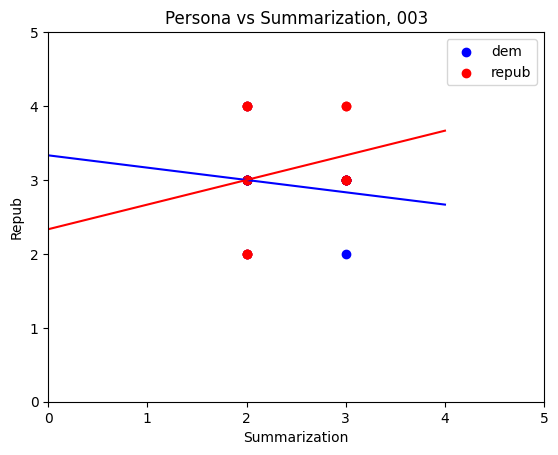

In [57]:
dem_i, repub_i, noprompt_i, SUM_i, SUM_noquestion_i, SUM_tatsu_i, dem_s, repub_s, noprompt_s, SUM_s, SUM_noquestion_s, SUM_tatsu_s=get_data(small_003)
plt.scatter(noprompt_s, dem_s, color='blue', label='dem')
plt.scatter(noprompt_s, repub_s, color='red', label='repub')
x = np.arange(5)
slope, intercept, r_value, p_value, std_err = stats.linregress(noprompt_s,dem_s)
plt.plot(x, slope*x + intercept, 'b-')
slope, intercept, r_value, p_value, std_err = stats.linregress(noprompt_s,repub_s)
plt.plot(x, slope*x + intercept, 'r-')

plt.xlabel('No Prompt')
plt.xlim([0, 5])
plt.ylim([0, 5])
plt.legend()
plt.title("Persona vs No Prompt, 003")
plt.show()

plt.scatter(np.repeat(SUM_s, 3), dem_s, color='blue', label='dem')
plt.scatter(np.repeat(SUM_s, 3), repub_s, color='red', label='repub')

slope, intercept, r_value, p_value, std_err = stats.linregress(np.repeat(SUM_s, 3),dem_s)
plt.plot(x, slope*x + intercept, 'b-')
slope, intercept, r_value, p_value, std_err = stats.linregress(np.repeat(SUM_s, 3),repub_s)
plt.plot(x, slope*x + intercept, 'r-')
plt.xlabel('Summarization')
plt.ylabel('Repub')
plt.xlim([0, 5])
plt.ylim([0, 5])
plt.legend()
plt.title("Persona vs Summarization, 003")
plt.show()


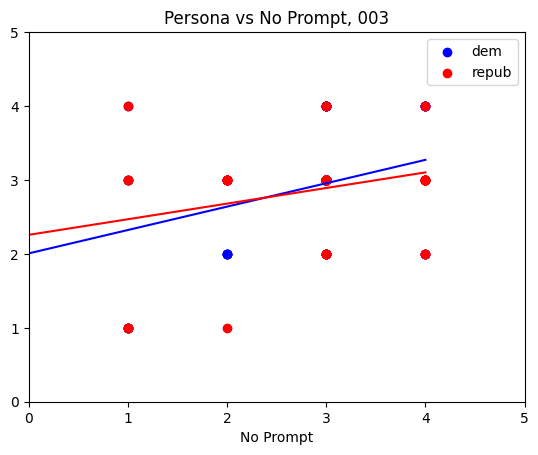

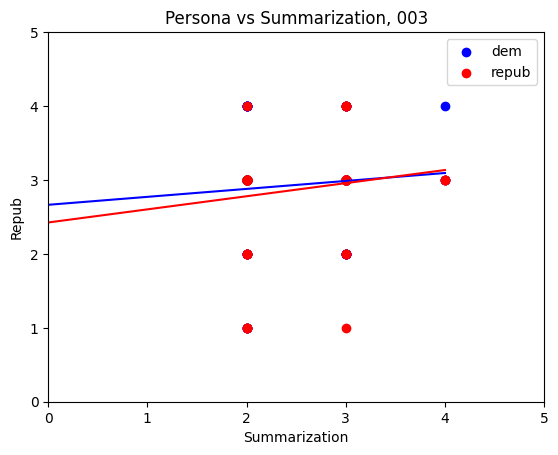

In [58]:
dem_i, repub_i, noprompt_i, SUM_i, SUM_noquestion_i, SUM_tatsu_i, dem_s, repub_s, noprompt_s, SUM_s, SUM_noquestion_s, SUM_tatsu_s=get_data(large_003)
plt.scatter(noprompt_s, dem_s, color='blue', label='dem')
plt.scatter(noprompt_s, repub_s, color='red', label='repub')
x = np.arange(5)
slope, intercept, r_value, p_value, std_err = stats.linregress(noprompt_s,dem_s)
plt.plot(x, slope*x + intercept, 'b-')
slope, intercept, r_value, p_value, std_err = stats.linregress(noprompt_s,repub_s)
plt.plot(x, slope*x + intercept, 'r-')

plt.xlabel('No Prompt')
plt.xlim([0, 5])
plt.ylim([0, 5])
plt.legend()
plt.title("Persona vs No Prompt, 003")
plt.show()

plt.scatter(np.repeat(SUM_s, 3), dem_s, color='blue', label='dem')
plt.scatter(np.repeat(SUM_s, 3), repub_s, color='red', label='repub')

slope, intercept, r_value, p_value, std_err = stats.linregress(np.repeat(SUM_s, 3),dem_s)
plt.plot(x, slope*x + intercept, 'b-')
slope, intercept, r_value, p_value, std_err = stats.linregress(np.repeat(SUM_s, 3),repub_s)
plt.plot(x, slope*x + intercept, 'r-')
plt.xlabel('Summarization')
plt.ylabel('Repub')
plt.xlim([0, 5])
plt.ylim([0, 5])
plt.legend()
plt.title("Persona vs Summarization, 003")
plt.show()


# 2/27

In [142]:
with open(path+'crfm_results/summarization/002/strong/triviaQAmini/temp_0.5/score_N_3.json', 'r') as f:
  data = json.load(f)

questions = data.keys()
trivia_offdiaggap = []
for question in questions:
  if not math.isnan(data[question]['off_diagonal_gap']):
    trivia_offdiaggap.append(data[question]['off_diagonal_gap'])

In [143]:
with open(path+'crfm_results/summarization/002/strong/triviaQA/temp_0.5/score_N_3.json', 'r') as f:
  data = json.load(f)

questions = data.keys()
for question in questions:
  if not math.isnan(data[question]['off_diagonal_gap']):
    trivia_offdiaggap.append(data[question]['off_diagonal_gap'])

In [144]:
trivia_offdiaggap_polarizing = []

with open(path+'crfm_results/summarization/002/strong/polarizingqs/temp_0.5/score_N_3.json', 'r') as f:
  data = json.load(f)
  questions = data.keys()
for question in questions:
  if not math.isnan(data[question]['off_diagonal_gap']):
    trivia_offdiaggap_polarizing.append(data[question]['off_diagonal_gap'])

trivia_offdiaggap_polarizing = trivia_offdiaggap_polarizing[:5] # remove the last valueaverage

In [145]:
with open(path+'crfm_results/summarization/002/strong/polarizingqs_large/temp_0.5/score_N_3.json', 'r') as f:
  data = json.load(f)
  questions = data.keys()
for question in questions:
  if not math.isnan(data[question]['off_diagonal_gap']):
    trivia_offdiaggap_polarizing.append(data[question]['off_diagonal_gap'])
trivia_offdiaggap_polarizing = trivia_offdiaggap_polarizing[:-1] # remove the last valueaverage

0.0
0.0023474605655420346
0.004694921131084068
0.007042381696626103
0.009615626137252812
0.012221125417177332
0.01482662469710185
0.017371245036003055
0.01989557239456315
0.022419899753123244
0.024821876490175053
0.027150442854321884
0.029479009218468712
0.03071445981577054
0.03085679464622736
0.030999129476684182
0.03135447639549953
0.03206484346157908
0.03277521052765864
0.03363539010918527
0.034945007237053155
0.03625462436492103
0.037467741151158515
0.038005355545983194
0.03854296994080787
0.03908058433563255
0.04264103224153191
0.046201480147431265
0.04976192805333063
0.050207043103090626
0.05020711060197358
0.050207178100856543
0.051467931346847046
0.05314891317520674
0.05482989500356642
0.056614351476409426
0.05846089273594243
0.06030743399547544
0.062222328871875975
0.06420557736514404
0.06618882585841211
0.06760865478814412
0.06808945111198272
0.06857024743582132
0.06924030266261198
0.07047813459825882
0.07171596653390565
0.0730312084067577
0.07488831984004637
0.07674543127333

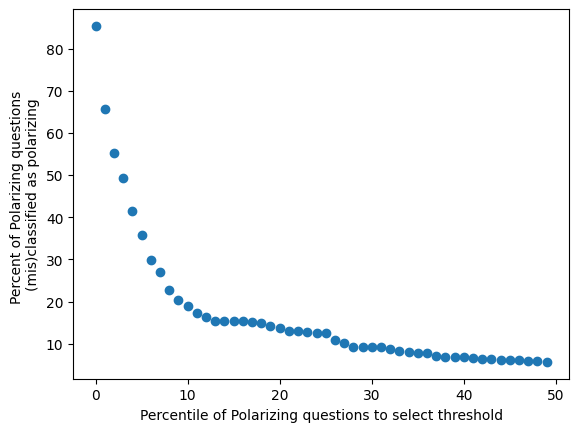

In [146]:
# calculate quantiles for threshold sweeping 
percent_triviaQA_classified_polarizing = []
for i in np.linspace(0, 49, 50):
    threshold = np.percentile(trivia_offdiaggap_polarizing, i)
    print(threshold)
    percent_triviaQA_classified_polarizing.append((trivia_offdiaggap >= threshold).sum() / len(trivia_offdiaggap)*100)
    # print("Percentile: {:.0f}, Threshold: {:.06f}, Percent of TriviaQA classified as polarizing: {:.06f}".format(i, threshold, (trivia_offdiaggap >= threshold).sum() / len(trivia_offdiaggap)))

plt.scatter(np.linspace(0, 49, 50), percent_triviaQA_classified_polarizing)
plt.xlabel('Percentile of Polarizing questions to select threshold')
plt.ylabel('Percent of Polarizing questions \n(mis)classified as polarizing')
plt.show()

In [147]:
# TPR VS FPR
import numpy as np

def roc_curve(y_true, y_prob, thresholds):

    fpr = []
    tpr = []

    for threshold in thresholds:

        y_pred = np.where(y_prob >= threshold, 1, 0)

        fp = np.sum((y_pred == 1) & (y_true == 0))
        tp = np.sum((y_pred == 1) & (y_true == 1))

        fn = np.sum((y_pred == 0) & (y_true == 1))
        tn = np.sum((y_pred == 0) & (y_true == 0))

        fpr.append(fp / (fp + tn))
        tpr.append(tp / (tp + fn))

    return [fpr, tpr]

In [151]:
print("np.mean(trivia_offdiaggap_polarizing): ", np.mean(trivia_offdiaggap_polarizing), "np.mean(trivia_offdiaggap)",  np.mean(trivia_offdiaggap))


np.mean(trivia_offdiaggap_polarizing):  0.126764292550949 np.mean(trivia_offdiaggap) 0.021631351876162903


12.0 0.029479009218468712


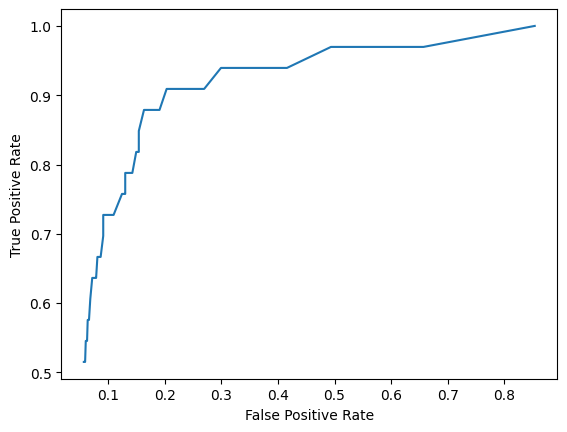

In [149]:
thresholds = []
for i in np.linspace(0, 49, 50):
    thresholds.append(np.percentile(trivia_offdiaggap_polarizing, i))

# y_true is a 0 or 1 label where 1 is polarizing question and 0 is nonpolarizing question (triviaQA) 
y_true = np.concatenate((np.ones(len(trivia_offdiaggap_polarizing)), np.zeros(len(trivia_offdiaggap))), axis=0)
# y_prob is the agreement scores, append these together, first with polarizing agreement scores then nonpolarizing agreement scores
y_prob = np.concatenate((trivia_offdiaggap_polarizing,trivia_offdiaggap), axis=0)
[fpr, tpr] = roc_curve(y_true, y_prob, thresholds)
fpr, tpr = np.array(fpr), np.array(tpr)
# PICK THRESHOLD THAT MAXIMIZES TPR-FPR
optimal_threshold, optimal_threshold_percentile = np.linspace(0, 49, 50)[np.argmax((tpr-fpr))], thresholds[np.argmax((tpr-fpr))]
print(optimal_threshold, optimal_threshold_percentile)

plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

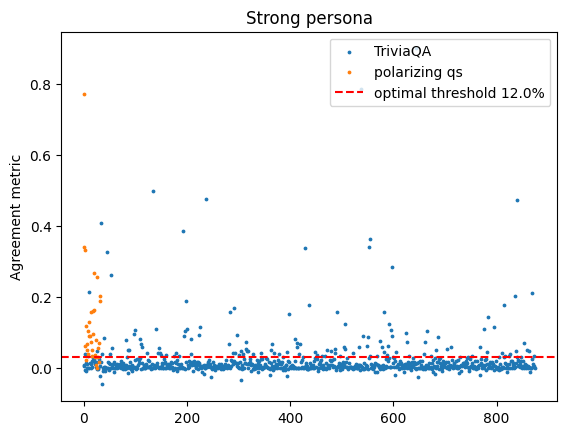

In [150]:
plt.scatter(np.arange(len(trivia_offdiaggap)), trivia_offdiaggap, label='TriviaQA',s=3)
plt.scatter(np.arange(len(trivia_offdiaggap_polarizing)), trivia_offdiaggap_polarizing, label='polarizing qs',s=3)

plt.axhline(y = optimal_threshold_percentile, color = 'r', linestyle = '--', label='optimal threshold {}%'.format(optimal_threshold))

plt.legend(loc='upper right')
plt.title("Strong persona")
plt.ylabel('Agreement metric')
plt.show()


In [139]:
from scipy import stats
stats.ttest_ind(trivia_offdiaggap, trivia_offdiaggap_polarizing)

Ttest_indResult(statistic=-8.659245598911081, pvalue=2.1504220439181853e-17)

In [ ]:
with open(path+'crfm_results/summarization/002/LM_convo_1/polarizingqs_large/temp_0.5/score_N_3.json', 'r') as f:
  data = json.load(f)

questions = data.keys()
trivia_offdiaggap = []
for question in questions:
  trivia_offdiaggap.append(data[question]['off_diagonal_gap'])
  

In [ ]:
trivia_offdiaggap_polarizing = []

with open(path+'crfm_results/summarization/002/LM_convo_1/temp_0.5/score_polarizingqs_N_3.json', 'r') as f:
  data = json.load(f)
  questions = data.keys()
for question in questions:
  trivia_offdiaggap_polarizing.append(data[question]['off_diagonal_gap'])

trivia_offdiaggap_polarizing = trivia_offdiaggap_polarizing[:5] # remove the last valueaverage

In [ ]:
with open(path+'crfm_results/summarization/002/LM_convo_1/polarizingqs_large/temp_0.5/score_N_3.json', 'r') as f:
  data = json.load(f)
  questions = data.keys()
for question in questions:
  trivia_offdiaggap_polarizing.append(data[question]['off_diagonal_gap'])

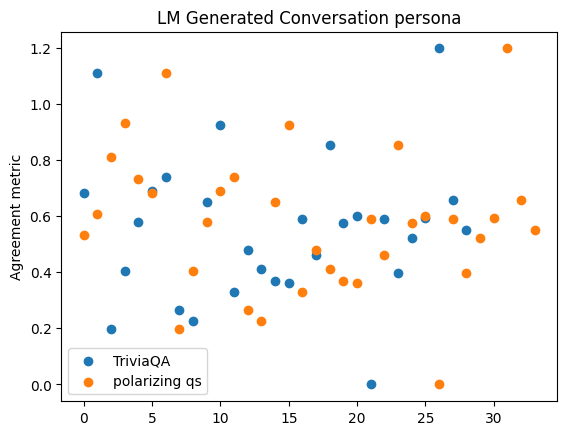

In [ ]:
plt.scatter(np.arange(len(trivia_offdiaggap)), trivia_offdiaggap, label='TriviaQA')
plt.scatter(np.arange(len(trivia_offdiaggap_polarizing)), trivia_offdiaggap_polarizing, label='polarizing qs')
plt.legend()
plt.ylabel('Agreement metric')
plt.title("LM Generated Conversation persona")
plt.show()


In [ ]:
from scipy import stats
stats.ttest_ind(trivia_offdiaggap, trivia_offdiaggap_polarizing)

Ttest_indResult(statistic=-0.3896353471788831, pvalue=0.6981632766015076)

# 2/22

In [ ]:
questions = ['You: Do you think people have the right to bear arms?\nFriend:', 
               'You: Do you think an unborn fetus is a living person?\nFriend:',
               'You: Are climate scientists exaggerating the potential risks due to global warming?\nFriend:',
               'You: Do you think vaccines are safe?\nFriend:',
               'You: Do you think allowing female transgender athletes to compete with those born as women is fair?\nFriend:']
  

In [ ]:
data_filenames = os.listdir('/content')
wordsize_results, iou_results = {}, {}
for fname in data_filenames:
  if fname=='.ipynb_checkpoints' or fname=='.DS_Store' or fname=='.config' or fname=='sample_data': continue
  with open("/content/{}".format(fname), 'r') as f:
    data = json.load(f)
  
  gamma = fname.split('_')[2]
  wordsize_results[gamma] = {}
  iou_results[gamma] = {}

  words_both_size, iou = [], []
  for question in questions: 
    wordsize_results[gamma][question] = data[question]['agreeable']['words_both_size']
    iou_results[gamma][question] = data[question]['agreeable']['iou']

0.0


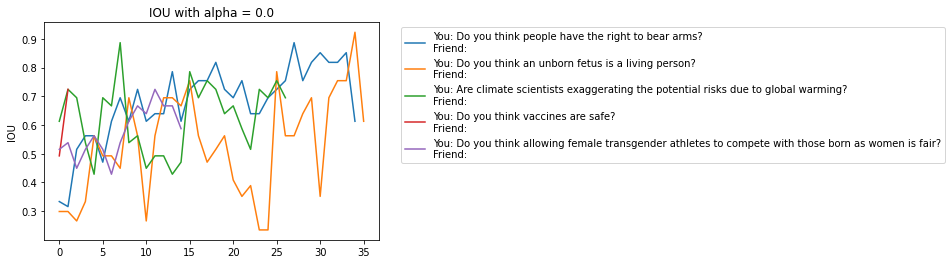

0.25


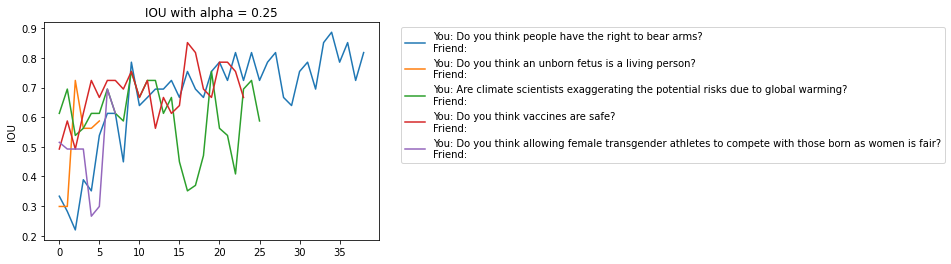

0.5


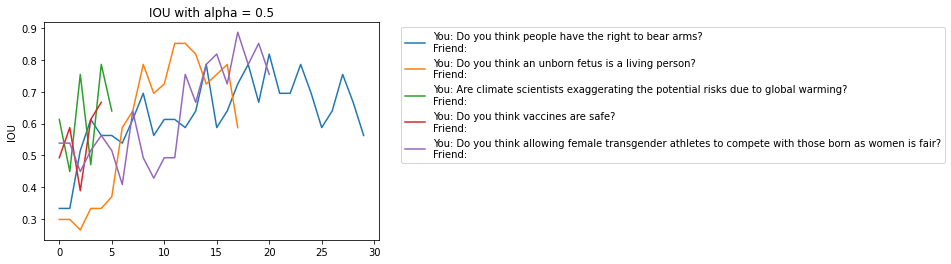

0.75


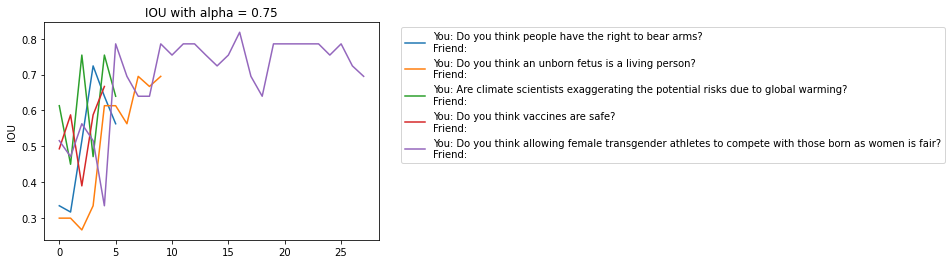

In [ ]:
import matplotlib.pyplot as plt
# plot lines

for gamma in wordsize_results.keys():
  print(gamma)
  for question in questions:
    plt.plot(np.arange(len(iou_results[gamma][question])), iou_results[gamma][question], label=question)

  plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
  plt.title('IOU with alpha = {}'.format(gamma))
  plt.ylabel('IOU')
  plt.show()


<ipython-input-14-7fe678d82801>:9: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


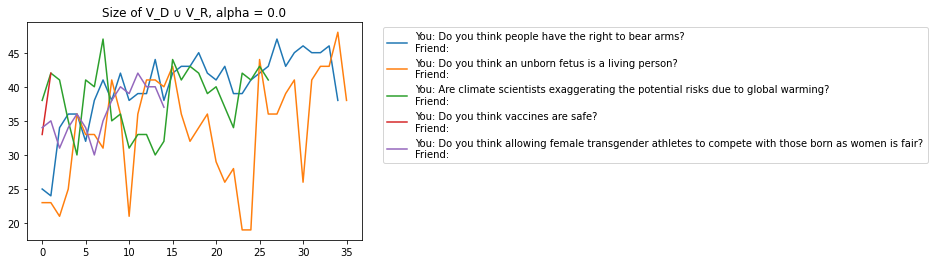

<ipython-input-14-7fe678d82801>:9: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


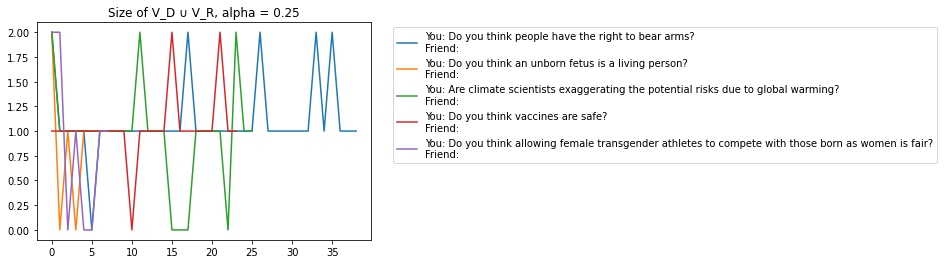

<ipython-input-14-7fe678d82801>:9: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


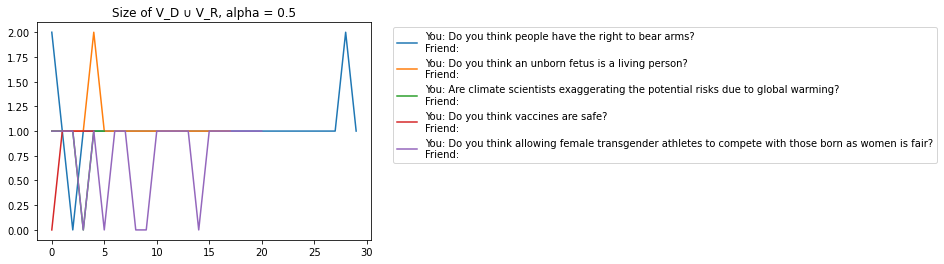

<ipython-input-14-7fe678d82801>:9: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


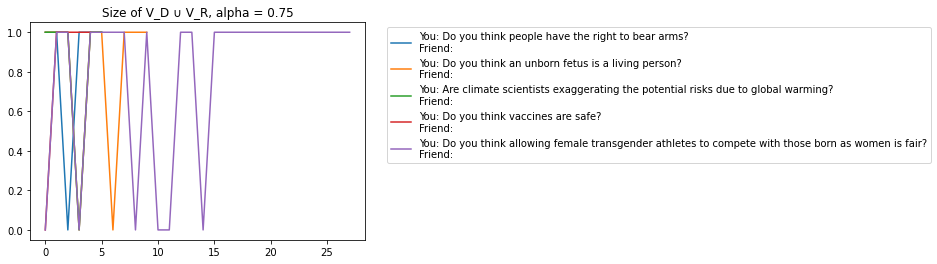

In [ ]:
import matplotlib.pyplot as plt
# plot lines

for gamma in wordsize_results.keys():
  for question in questions:
    plt.plot(np.arange(len(wordsize_results[gamma][question])), wordsize_results[gamma][question], label=question)

  plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
  plt.tight_layout()
  plt.title('Size of V_D ∪ V_R, alpha = {}'.format(gamma))
  plt.show()

### plotting the log probs of each persona

In [ ]:
data_filenames = os.listdir('/content')
logprobs = {}
for fname in data_filenames:
  if fname=='.ipynb_checkpoints' or fname=='.DS_Store' or fname=='.config' or fname=='sample_data': continue
  with open("/content/{}".format(fname), 'r') as f:
    data = json.load(f)
  
  gamma = fname.split('_')[2]
  wordsize_results[gamma] = {}
  logprobs[gamma] = {}

  words_both_size, iou = [], []
  for question in questions: 
    logprobs[gamma][question] = data[question]['agreeable']['logprobs']


0.0


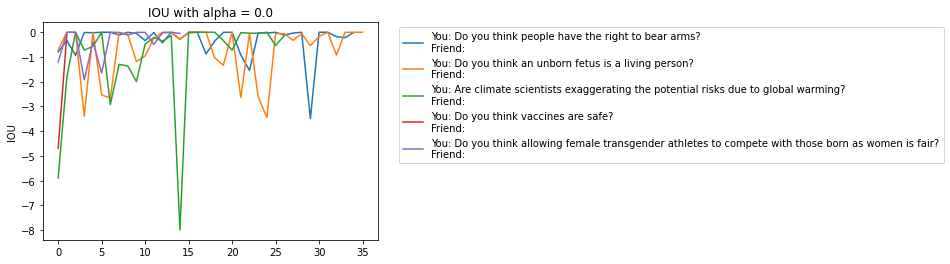

0.25


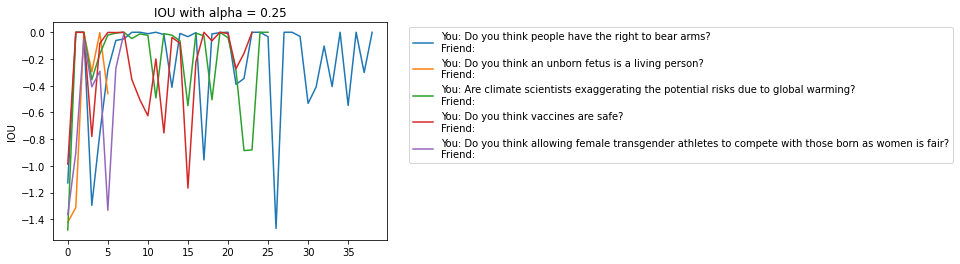

0.5


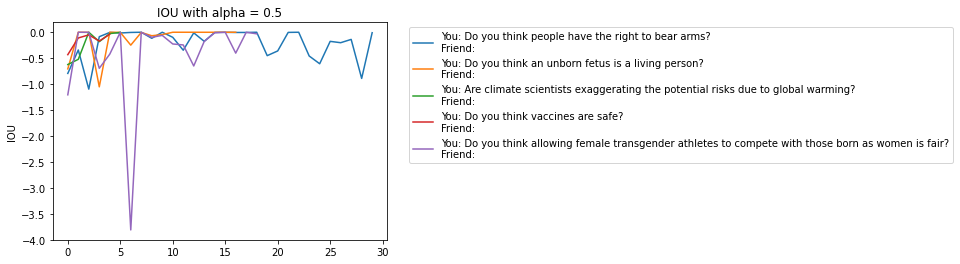

0.75


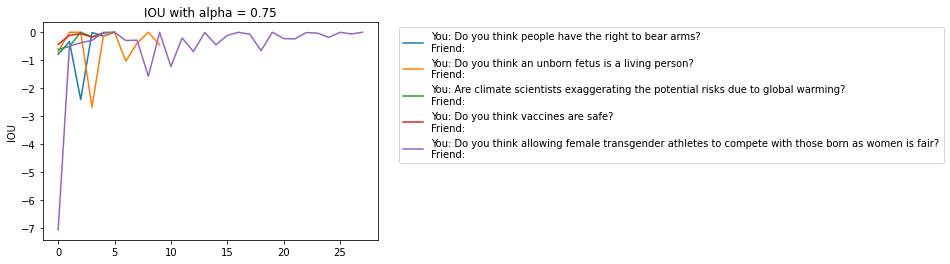

In [ ]:
import matplotlib.pyplot as plt
# plot lines

for gamma in wordsize_results.keys():
  print(gamma)
  for question in questions:
    plt.plot(np.arange(len(logprobs[gamma][question])), logprobs[gamma][question], label=question)

  plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
  plt.title('Log Probs with alpha = {}'.format(gamma))
  plt.ylabel('Log Probs')
  plt.show()


In [ ]:
with open('/content/LM_convo_1_polarizingqs_N_3.json', 'r') as f:
  data = json.load(f)

In [ ]:
dem_logprobs = []
repub_logprobs = []
for question in questions: 
  for i in range(3):
    dem_logprobs.append(data[question]['dem_logprobs'][i])
    repub_logprobs.append(data[question]['repub_logprobs'][i])

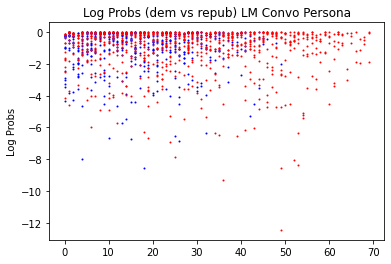

In [ ]:
for logprobs in dem_logprobs:
  plt.scatter(np.arange(len(logprobs)), logprobs, label='dem', color='blue', s=1)

for logprobs in repub_logprobs:
  plt.scatter(np.arange(len(logprobs)), logprobs, label='repub', color='red', s=1)

plt.title('Log Probs (dem vs repub) LM Convo Persona')
plt.ylabel('Log Probs')
plt.show()

In [ ]:
with open('/content/strong_polarizingqs_N_3.json', 'r') as f:
  data = json.load(f)

In [ ]:
dem_logprobs = []
repub_logprobs = []
for question in questions: 
  for i in range(3):
    dem_logprobs.append(data[question]['dem_logprobs'][i])
    repub_logprobs.append(data[question]['repub_logprobs'][i])

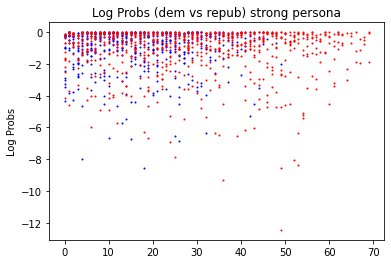

In [ ]:
for logprobs in dem_logprobs:
  plt.scatter(np.arange(len(logprobs)), logprobs, label='dem', color='blue', s=1)

for logprobs in repub_logprobs:
  plt.scatter(np.arange(len(logprobs)), logprobs, label='repub', color='red', s=1)

plt.title('Log Probs (dem vs repub) strong persona')
plt.ylabel('Log Probs')
plt.show()

### off diagonal gap


In [ ]:
def get_data(arr):
  # guns
  arr.append(data['You: Do you think people have the right to bear arms?\nFriend:']['off_diagonal_gap'])

  # 'abortion' 
  arr.append(data['You: Do you think an unborn fetus is a living person?\nFriend:']['off_diagonal_gap'])

  # 'climate'
  arr.append(data['You: Are climate scientists exaggerating the potential risks due to global warming?\nFriend:']['off_diagonal_gap'])

  # 'vaccines'
  arr.append(data['You: Do you think vaccines are safe?\nFriend:']['off_diagonal_gap'])

  # 'transgender'
  arr.append(data['You: Do you think allowing female transgender athletes to compete with those born as women is fair?\nFriend:']['off_diagonal_gap'])

  return arr

In [ ]:
strong_offdiaggap_003 = []
with open('/content/003_strong_score_polarizingqs_N_3.json', 'r') as f:
  data = json.load(f)
  strong_offdiaggap = get_data(strong_offdiaggap_003)

LM_gen_convo_offdiaggap_003 = []
with open('/content/003_LM_convo_1_score_polarizingqs_N_3.json', 'r') as f:
  data = json.load(f)
  LM_gen_convo_offdiaggap = get_data(LM_gen_convo_offdiaggap_003)
  
strong_offdiaggap_002 = []
with open('/content/002_strong_score_polarizingqs_N_3.json', 'r') as f:
  data = json.load(f)
  strong_offdiaggap = get_data(strong_offdiaggap_002)

LM_gen_convo_offdiaggap_002 = []
with open('/content/002_LM_convo_1_score_polarizingqs_N_3.json', 'r') as f:
  data = json.load(f)
  LM_gen_convo_offdiaggap = get_data(LM_gen_convo_offdiaggap_002)
  

Text(0, 0.5, 'Off Diagonal - Diagonal')

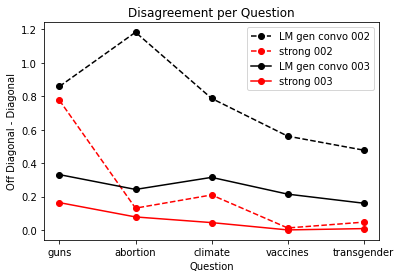

In [ ]:
x_axis = ['guns', 'abortion', 'climate', 'vaccines', 'transgender']
line1 = plt.plot(x_axis, LM_gen_convo_offdiaggap_002,'ko--',label='LM gen convo 002')
line2 = plt.plot(x_axis, strong_offdiaggap_002,'ro--',label='strong 002') 
line3 = plt.plot(x_axis, LM_gen_convo_offdiaggap_003,'ko-',label='LM gen convo 003')
line4 = plt.plot(x_axis, strong_offdiaggap_003,'ro-',label='strong 003') 
plt.legend()
plt.title("Disagreement per Question")
plt.xlabel('Question')
plt.ylabel('Off Diagonal - Diagonal')

In [ ]:
x_axis = ['guns', 'abortion', 'climate', 'vaccines', 'transgender']
line1 = plt.plot(x_axis, LM_gen_convo_offdiaggap,'ko-',label='LM gen convo')
line2 = plt.plot(x_axis, strong_offdiaggap,'ro-',label='strong') 
plt.legend()
plt.title("Disagreement per Question")
plt.xlabel('Question')
plt.ylabel('Off Diagonal - Diagonal')

### temperature

In [ ]:
# temperature 
LM_gen_convo_offdiaggap_002_temp_1_0 = LM_gen_convo_offdiaggap_002.copy()
strong_offdiaggap_002_1_0 = strong_offdiaggap_002.copy()

In [ ]:
strong_offdiaggap_002_0_1 = []
with open('/content/003_strong_score_polarizingqs_N_3.json', 'r') as f:
  data = json.load(f)
  strong_offdiaggap = get_data(strong_offdiaggap_002_0_1)

LM_gen_convo_offdiaggap_002_0_1 = []
with open('/content/003_LM_convo_1_score_polarizingqs_N_3.json', 'r') as f:
  data = json.load(f)
  LM_gen_convo_offdiaggap = get_data(LM_gen_convo_offdiaggap_002_0_1)
  
strong_offdiaggap_002_0_5 = []
with open('/content/002_strong_score_polarizingqs_N_3.json', 'r') as f:
  data = json.load(f)
  strong_offdiaggap = get_data(strong_offdiaggap_002_0_5)

LM_gen_convo_offdiaggap_002_0_5 = []
with open('/content/002_LM_convo_1_score_polarizingqs_N_3.json', 'r') as f:
  data = json.load(f)
  LM_gen_convo_offdiaggap = get_data(LM_gen_convo_offdiaggap_002_0_5)
  

#2/15

In [ ]:
questions = ['You: Do you think people have the right to bear arms?\nFriend:', 
               'You: Do you think an unborn fetus is a living person?\nFriend:',
               'You: Are climate scientists exaggerating the potential risks due to global warming?\nFriend:',
               'You: Do you think vaccines are safe?\nFriend:',
               'You: Do you think allowing female transgender athletes to compete with those born as women is fair?\nFriend:']
  

In [ ]:
data_filenames = os.listdir('/content')
wordsize_results, iou_results = {}, {}
for fname in data_filenames:
  if fname=='.ipynb_checkpoints' or fname=='.DS_Store' or fname=='.config' or fname=='sample_data': continue
  with open("/content/{}".format(fname), 'r') as f:
    data = json.load(f)
  
  gamma = fname.split('_')[-1].split('.')[0]
  if gamma== '-2': continue
  wordsize_results[gamma] = {}
  iou_results[gamma] = {}

  words_both_size, iou = [], []
  for question in questions:
    print(data[question]['agreeable']['S'])
    wordsize_results[gamma][question] = data[question]['agreeable']['words_both_size']
    iou_results[gamma][question] = data[question]['agreeable']['iou']




There is a lot of debate on this issue, but I think that people have the right to bear arms for self-



I think that an unborn fetus is a living person, yes.



There is a lot of debate on this issue, but I think that it's important to be cautious and take measures to reduce greenhouse gas emissions.
 From what I've heard, I think they're safe.



No, I don't think it's fair.
 I think that people have the right to bear arms for self-



I believe that an unborn fetus is a living person.
 I don't think so.



I don't really know much about vaccines, but I think they're probably safe.
 I think that it's not fair because they have an unfair advantage.
 I think people have the right to bear arms, but I also think there should be stricter regulations on who can buy guns and where they can be carried.
 I think it's a complicated question.
 I don't think so.



I don't really know enough about the topic to have an informed opinion.
 No, I don't think it's fair.
 I think that people have t

-10


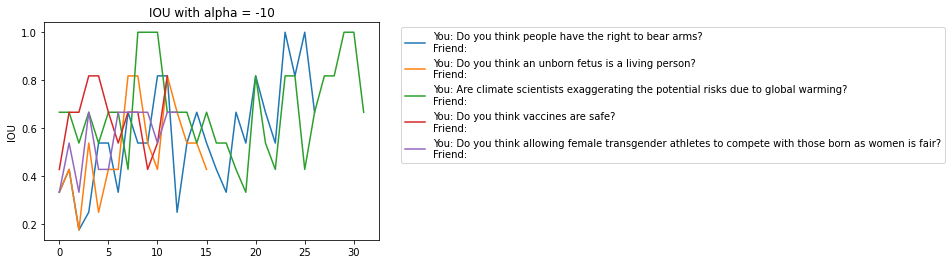

-5


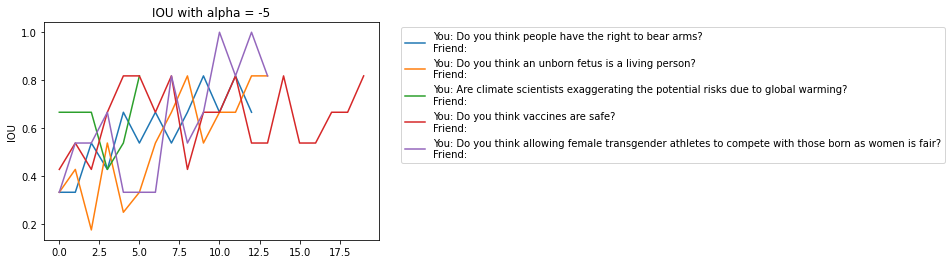

0


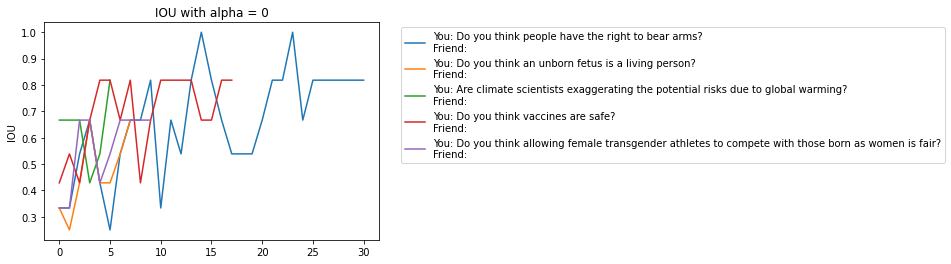

-15


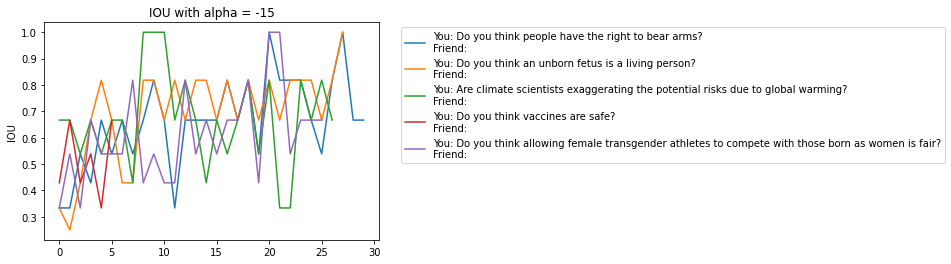

-20


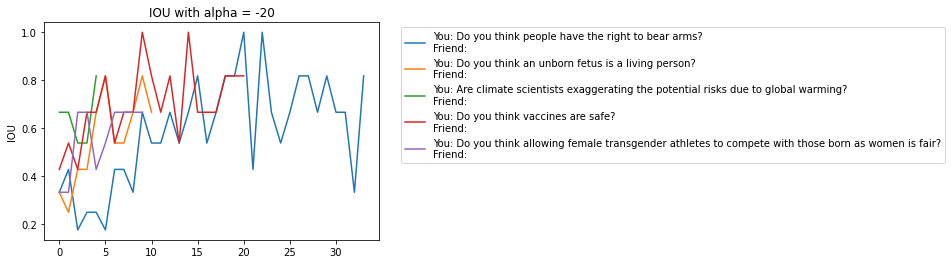

In [ ]:
import matplotlib.pyplot as plt
# plot lines

for gamma in wordsize_results.keys():
  print(gamma)
  for question in questions:
    plt.plot(np.arange(len(iou_results[gamma][question])), iou_results[gamma][question], label=question)

  plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
  plt.title('IOU with alpha = {}'.format(gamma))
  plt.ylabel('IOU')
  plt.show()


<ipython-input-67-7fe678d82801>:9: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


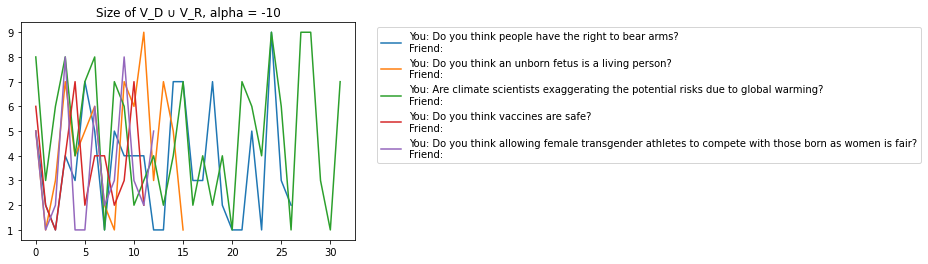

<ipython-input-67-7fe678d82801>:9: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


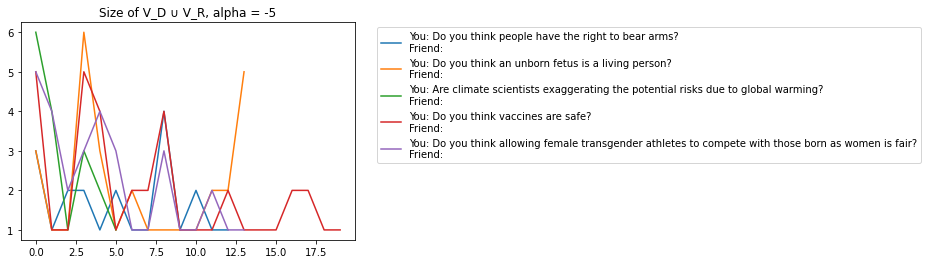

<ipython-input-67-7fe678d82801>:9: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


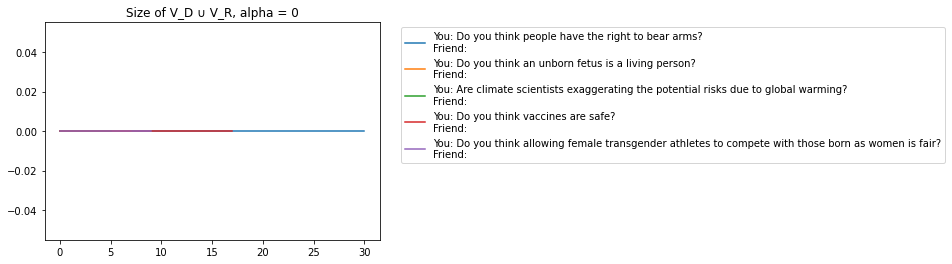

<ipython-input-67-7fe678d82801>:9: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


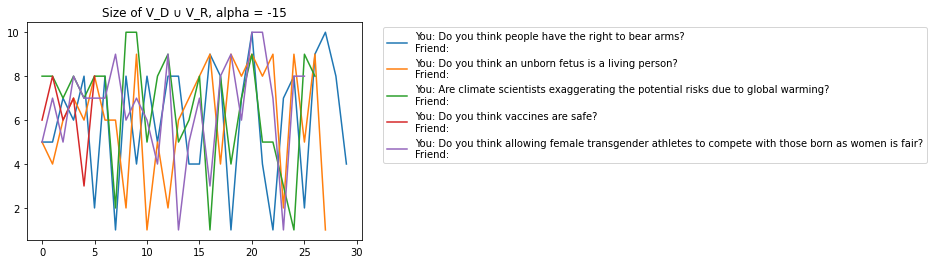

<ipython-input-67-7fe678d82801>:9: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


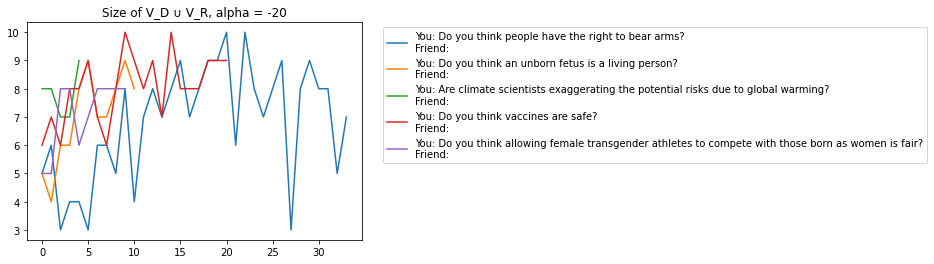

In [ ]:
import matplotlib.pyplot as plt
# plot lines

for gamma in wordsize_results.keys():
  for question in questions:
    plt.plot(np.arange(len(wordsize_results[gamma][question])), wordsize_results[gamma][question], label=question)

  plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
  plt.tight_layout()
  plt.title('Size of V_D ∪ V_R, alpha = {}'.format(gamma))
  plt.show()

# 2/13

In [ ]:
!unzip /content/LM_convo_temp_0.6_scores.zip

Archive:  /content/LM_convo_temp_0.6_scores.zip
   creating: scores/
  inflating: scores/score_dem_1_repub_0_2_polarizingqs.json  
  inflating: scores/score_dem_1_repub_1_2_polarizingqs.json  
  inflating: scores/score_dem_1_repub_2_2_polarizingqs.json  
  inflating: scores/score_dem_1_repub_3_2_polarizingqs.json  
  inflating: scores/score_dem_0_repub_2_2_polarizingqs.json  
  inflating: scores/score_dem_0_repub_3_2_polarizingqs.json  
  inflating: scores/score_dem_0_repub_0_2_polarizingqs.json  
  inflating: scores/score_dem_0_repub_1_2_polarizingqs.json  
  inflating: scores/score_dem_3_repub_0_2_polarizingqs.json  
  inflating: scores/score_dem_3_repub_1_2_polarizingqs.json  
  inflating: scores/score_dem_3_repub_2_2_polarizingqs.json  
  inflating: scores/score_dem_3_repub_3_2_polarizingqs.json  
  inflating: scores/score_dem_2_repub_2_2_polarizingqs.json  
  inflating: scores/score_dem_2_repub_3_2_polarizingqs.json  
  inflating: scores/score_dem_2_repub_0_2_polarizingqs.json  
 

In [ ]:
!unzip /content/LM_persona_temp0.6_scores.zip

Archive:  /content/LM_persona_temp0.6_scores.zip
   creating: scores/
  inflating: scores/score_dem_1_repub_0_2_polarizingqs.json  
  inflating: scores/score_dem_1_repub_1_2_polarizingqs.json  
  inflating: scores/score_dem_0_repub_0_2_polarizingqs.json  
  inflating: scores/score_dem_0_repub_1_2_polarizingqs.json  


In [ ]:
# read in the data
results = {}
data_filenames = os.listdir('/content')
for fname in data_filenames:
  print(fname)
  if fname=='.ipynb_checkpoints' or fname=='.DS_Store' or fname=='.config' or fname=='sample_data': continue
  with open("/content/{}".format(fname), 'r') as f:
    data = json.load(f)

  off_diag_gap = []
  # 'guns'
  off_diag_gap.append(data['You: Do you think people have the right to bear arms?\nFriend:']['off_diagonal_gap'])

  # 'abortion' 
  off_diag_gap.append(data['You: Do you think an unborn fetus is a living person?\nFriend:']['off_diagonal_gap'])

  # 'climate'
  off_diag_gap.append(data['You: Are climate scientists exaggerating the potential risks due to global warming?\nFriend:']['off_diagonal_gap'])

  # 'vaccines'
  off_diag_gap.append(data['You: Do you think vaccines are safe?\nFriend:']['off_diagonal_gap'])

  # 'transgender'
  off_diag_gap.append(data['You: Do you think allowing female transgender athletes to compete with those born as women is fair?\nFriend:']['off_diagonal_gap'])

  results[fname[6:-20]] = off_diag_gap


.config
score_dem_0_repub_1_0_polarizingqs.json
score_dem_1_repub_1_0_polarizingqs.json
score_dem_1_repub_0_0_polarizingqs.json
score_dem_0_repub_0_0_polarizingqs.json
sample_data


Text(0.5, 1.0, 'Scoring Handwritten Convo Personas with disagreement metric')

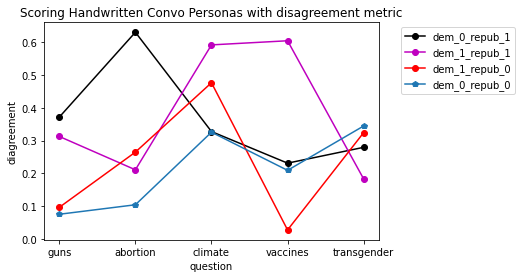

In [ ]:
x_axis = ['guns', 'abortion', 'climate', 'vaccines', 'transgender']
colors = ['ko-', 'mo-', 'ro-', 'p-', 'go-', 'bo-', 'ko-', 'mo-', 'ro-', 'p-', 'go-', 'bo-', 'ro-', 'p-', 'go-', 'bo-']

for i, name in enumerate(results.keys()):
  plt.plot(x_axis, results[name], colors[i],label=name)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.xlabel('question')
plt.ylabel('diagreement')
plt.title("Scoring Handwritten Convo Personas with disagreement metric")

In [ ]:
# read in the data
results = {}
data_filenames = os.listdir('/content/LM_convo_scores')
for fname in data_filenames:
  print(fname)
  if fname=='.ipynb_checkpoints' or fname=='.DS_Store': continue
  with open("/content/LM_convo_scores/{}".format(fname), 'r') as f:
    data = json.load(f)

  off_diag_gap = []
  # 'guns'
  off_diag_gap.append(data['You: Do you think people have the right to bear arms?\nFriend:']['off_diagonal_gap'])

  # 'abortion' 
  off_diag_gap.append(data['You: Do you think an unborn fetus is a living person?\nFriend:']['off_diagonal_gap'])

  # 'climate'
  off_diag_gap.append(data['You: Are climate scientists exaggerating the potential risks due to global warming?\nFriend:']['off_diagonal_gap'])

  # 'vaccines'
  off_diag_gap.append(data['You: Do you think vaccines are safe?\nFriend:']['off_diagonal_gap'])

  # 'transgender'
  off_diag_gap.append(data['You: Do you think allowing female transgender athletes to compete with those born as women is fair?\nFriend:']['off_diagonal_gap'])

  results[fname[6:-20]] = off_diag_gap


score_dem_3_repub_1_2_polarizingqs.json
score_dem_3_repub_2_2_polarizingqs.json
score_dem_1_repub_3_2_polarizingqs.json
score_dem_0_repub_2_2_polarizingqs.json
score_dem_0_repub_0_2_polarizingqs.json
score_dem_1_repub_0_2_polarizingqs.json
score_dem_0_repub_1_2_polarizingqs.json
score_dem_1_repub_2_2_polarizingqs.json
score_dem_2_repub_1_2_polarizingqs.json
score_dem_2_repub_2_2_polarizingqs.json
score_dem_3_repub_3_2_polarizingqs.json
score_dem_2_repub_3_2_polarizingqs.json
score_dem_0_repub_3_2_polarizingqs.json
score_dem_2_repub_0_2_polarizingqs.json
score_dem_3_repub_0_2_polarizingqs.json
score_dem_1_repub_1_2_polarizingqs.json


In [ ]:
results.keys()

dict_keys(['dem_3_repub_1', 'dem_3_repub_2', 'dem_1_repub_3', 'dem_0_repub_2', 'dem_0_repub_0', 'dem_1_repub_0', 'dem_0_repub_1', 'dem_1_repub_2', 'dem_2_repub_1', 'dem_2_repub_2', 'dem_3_repub_3', 'dem_2_repub_3', 'dem_0_repub_3', 'dem_2_repub_0', 'dem_3_repub_0', 'dem_1_repub_1'])

Text(0.5, 1.0, 'Scoring LM-Gen Convo Personas with disagreement metric')

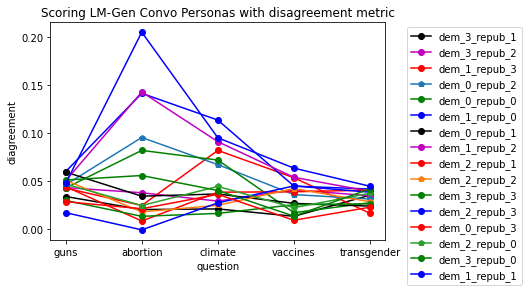

In [ ]:
x_axis = ['guns', 'abortion', 'climate', 'vaccines', 'transgender']
colors = ['ko-', 'mo-', 'ro-', 'p-', 'go-', 'bo-', 'ko-', 'mo-', 'ro-', 'p-', 'go-', 'bo-', 'ro-', 'p-', 'go-', 'bo-']

for i, name in enumerate(results.keys()):
  plt.plot(x_axis, results[name], colors[i],label=name)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.xlabel('question')
plt.ylabel('diagreement')
plt.title("Scoring LM-Gen Convo Personas with disagreement metric")

In [ ]:
results = {}
data_filenames = os.listdir('/content/LM_persona_scores')
for fname in data_filenames:
  print(fname)
  if fname=='.ipynb_checkpoints' or fname=='.DS_Store': continue
  with open("/content/LM_persona_scores/{}".format(fname), 'r') as f:
    data = json.load(f)

  off_diag_gap = []
  # 'guns'
  off_diag_gap.append(data['You: Do you think people have the right to bear arms?\nFriend:']['off_diagonal_gap'])

  # 'abortion' 
  off_diag_gap.append(data['You: Do you think an unborn fetus is a living person?\nFriend:']['off_diagonal_gap'])

  # 'climate'
  off_diag_gap.append(data['You: Are climate scientists exaggerating the potential risks due to global warming?\nFriend:']['off_diagonal_gap'])

  # 'vaccines'
  off_diag_gap.append(data['You: Do you think vaccines are safe?\nFriend:']['off_diagonal_gap'])

  # 'transgender'
  off_diag_gap.append(data['You: Do you think allowing female transgender athletes to compete with those born as women is fair?\nFriend:']['off_diagonal_gap'])

  results[fname[6:-20]] = off_diag_gap

score_dem_0_repub_0_2_polarizingqs.json
score_dem_1_repub_0_2_polarizingqs.json
score_dem_0_repub_1_2_polarizingqs.json
score_dem_1_repub_1_2_polarizingqs.json


Text(0.5, 1.0, 'Scoring LM-Gen Personas with disagreement metric')

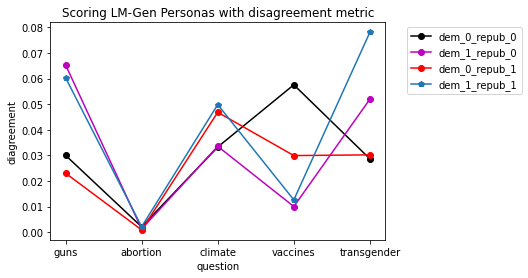

In [ ]:
x_axis = ['guns', 'abortion', 'climate', 'vaccines', 'transgender']
colors = ['ko-', 'mo-', 'ro-', 'p-', 'go-', 'bo-', 'ko-', 'mo-', 'ro-', 'p-', 'go-', 'bo-', 'ro-', 'p-', 'go-', 'bo-']

for i, name in enumerate(results.keys()):
  plt.plot(x_axis, results[name], colors[i],label=name)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.xlabel('question')
plt.ylabel('diagreement')
plt.title("Scoring LM-Gen Personas with disagreement metric")

Text(0.5, 1.0, 'Scoring Personas with disagreement metric')

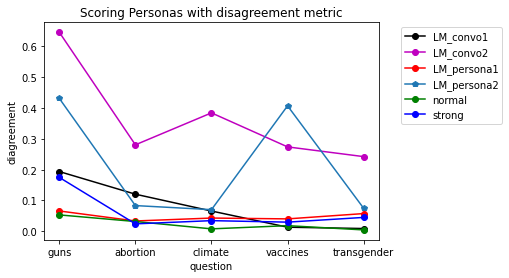

In [ ]:
x_axis = ['guns', 'abortion', 'climate', 'vaccines', 'transgender']
colors = ['ko-', 'mo-', 'ro-', 'p-', 'go-', 'bo-']
for i, name in enumerate(['LM_convo1', 'LM_convo2',  'LM_persona1', 'LM_persona2', 'normal', 'strong']):
  plt.plot(x_axis, results[name],colors[i],label=name)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.xlabel('question')
plt.ylabel('diagreement')
plt.title("Scoring Personas with disagreement metric")

# 2/12

Text(0, 0.5, 'diagreement')

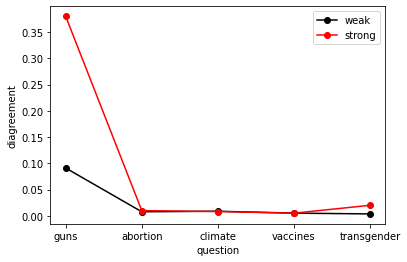

In [ ]:
x_axis = ['guns', 'abortion', 'climate', 'vaccines', 'transgender']
weak = [0.091, 0.0077, 0.0087, 0.0051, 0.0036 ]
strong = [0.38, 0.01, 0.0081, 0.005, 0.02]
line1 = plt.plot(x_axis, weak,'ko-',label='weak')
line2 = plt.plot(x_axis, strong,'ro-',label='strong') 
plt.legend()
plt.xlabel('question')
plt.ylabel('diagreement')

Text(0, 0.5, 'diagreement')

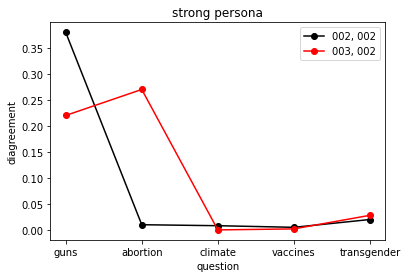

In [ ]:
x_axis = ['guns', 'abortion', 'climate', 'vaccines', 'transgender']
weak_002_002 = [0.091, 0.0077, 0.0087, 0.0051, 0.0036 ]
strong_002_002 = [0.38, 0.01, 0.0081, 0.005, 0.02]
strong_003_002 = [0.22, 0.27, 0, 0.002, 0.0281]

line1 = plt.plot(x_axis, strong_002_002,'ko-',label='002, 002')
line2 = plt.plot(x_axis, strong_003_002,'ro-',label='003, 002') 
plt.legend()
plt.title("strong persona")
plt.xlabel('question')
plt.ylabel('diagreement')

Text(0, 0.5, 'diagreement')

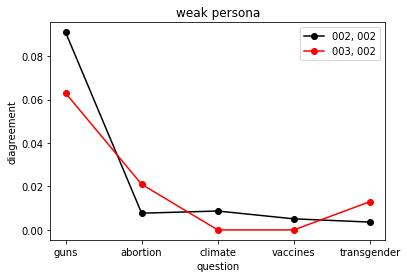

In [ ]:
x_axis = ['guns', 'abortion', 'climate', 'vaccines', 'transgender']
weak_002_002 = [0.091, 0.0077, 0.0087, 0.0051, 0.0036 ]
weak_003_002 = [0.063, 0.021, 0, 0, 0.013]

line1 = plt.plot(x_axis, weak_002_002,'ko-',label='002, 002')
line2 = plt.plot(x_axis, weak_003_002,'ro-',label='003, 002') 
plt.legend()
plt.title('weak persona')
plt.xlabel('question')
plt.ylabel('diagreement')

# 1/25 

In [ ]:
def cosine_similarity(matrix):
    sim_index = []
    for row1 in matrix:
        for row2 in matrix:
            sim_index.append(sum(row1*row2)/np.sqrt(sum(row1**2) * sum(row2**2)))
    return sim_index


## Multiple choice: Log prob of the multiple choice answer

In [ ]:



guns_matrix = np.array([[-16.423321,	-15.169215,	-14.217902,	-1.2064099,	-0.6531247], 
                  [-16.468178,	-15.121653,	-14.774952,	-0.6780909,	-1.045604], 
                  [-18.141117,	-15.945676,	-13.966231,	-0.0300795,	-7.2738498], 
                  [-16.867068,	-13.69038,	-13.633725,	-0.1556842,	-3.4309599], 
                  [-16.008303,	-15.351456,	-15.379616,	-0.7569069,	-0.6906699],
                  [-10.327793,	-0.1989512,	-3.6234836,	-1.9668765,	-8.5134668],
                  [-16.651146,	-13.527823,	-11.101696,	-0.0176336,	-5.2542596]])

blm_matrix = np.array([[-0.0044058,	-14.158147,	-15.669033,	-13.928585,	-10.140781],
                      [-0.0025511,	-11.889696,	-14.913417,	-13.017682,	-10.308399],
                      [-0.0017367,	-10.098122,	-13.507111,	-14.629327,	-8.3266879],
                      [-0.3854921,	-1.3321985,	-12.159564,	-13.323358,	-7.7225227],
                      [-0.0019114,	-15.250071,	-20.948311,	-17.804203,	-15.011287],
                      [-14.633998,	-0.0005467,	-10.304523,	-16.463484,	-12.251019],
                      [-0.001637,	-9.8468794,	-17.666331,	-15.188767,	-15.454321]])

abortion_matrix = np.array([[-15.613905,	-15.085766,	-14.637694,	-0.1553061,	-3.6379691],
                            [-18.099234,	-17.243047,	-17.298056,	-0.0187049,	-9.2366156],
                            [-16.942867,	-15.39934,	-13.906588,	-0.038902,	-4.6279565],
                            [-16.308341,	-13.998279,	-14.116499,	-0.0358843,	-7.3525599],
                            [-18.734164,	-17.679641,	-18.043189,	-0.0060776,	-16.636564],
                            [-0.8917202,	-0.5718381,	-12.576979,	-11.289204,	-10.87888],
                            [-14.870648,	-12.831902,	-13.383109,	-0.0303018,	-5.9847786]])

sim_index_guns = np.array(cosine_similarity(guns_matrix))
sim_index_blm = np.array(cosine_similarity(blm_matrix))
sim_index_abortion = np.array(cosine_similarity(abortion_matrix))

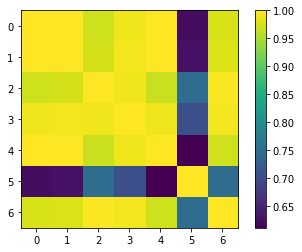

In [ ]:
plt.imshow(sim_index_guns.reshape((7,7)))
plt.colorbar()

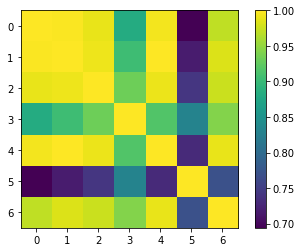

In [ ]:
plt.imshow(sim_index_blm.reshape((7,7)))
plt.colorbar()

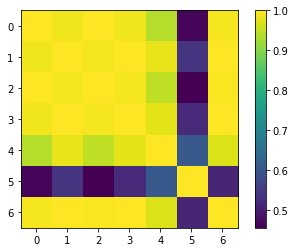

In [ ]:
plt.imshow(sim_index_abortion.reshape((7,7)))
plt.colorbar()

### Free text: sum of log probs over the sequence

In [ ]:
guns_matrix = np.array([[-30.070705,	-38.107282,	-39.567274],
                        [-21.77173,	-15.395907,	-22.062868],
                        [-36.645089,	-53.750829,	-28.780751]])
blm_matrix = np.array([[-23.508992,	-48.718053,	-47.48964],
                        [-59.90147,	-12.80002,	-57.932311],
                        [-31.642464,	-36.163332,	-23.691596]])
abortion_matrix = np.array([[-8.5333376,	-11.617875,	-12.572613],
                            [-7.7285652,	-5.2266707,	-8.9493356],
                            [-12.792912,	-11.669679,	-8.9433336]])


sim_index_guns = np.array(cosine_similarity(guns_matrix))
sim_index_blm = np.array(cosine_similarity(blm_matrix))
sim_index_abortion = np.array(cosine_similarity(abortion_matrix))

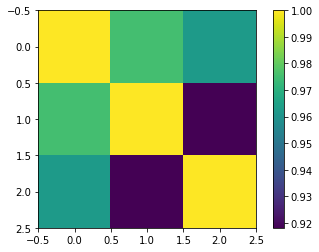

In [ ]:
plt.imshow(sim_index_guns.reshape((3,3)))
plt.colorbar()

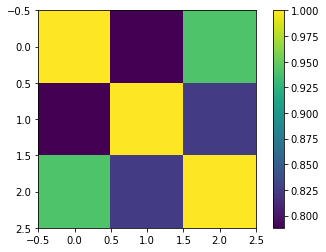

In [ ]:
plt.imshow(sim_index_blm.reshape((3,3)))
plt.colorbar()

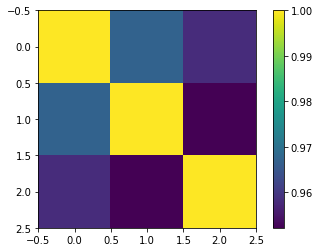

In [ ]:
plt.imshow(sim_index_abortion.reshape((3,3)))
plt.colorbar()

# 1/31

In [ ]:
import json
  
# Opening JSON file
f = open('/content/plausibility_sets_polarizingqs_top10.json')
polarizing_q= json.load(f)

'''
f = open('/content/plausibility_sets_neutralqs.json')
neutral_q = json.load(f)
f = open('/content/plausibility_sets_polarizing_qs.json')
polarizing_q= json.load(f)
'''

"\nf = open('/content/plausibility_sets_neutralqs.json')\nneutral_q = json.load(f)\nf = open('/content/plausibility_sets_polarizing_qs.json')\npolarizing_q= json.load(f)\n"

In [ ]:
polarizing_q[question]['persona'].keys()

dict_keys(['You: Do you think people have the right to bear arms?\nFriend:', 'You: Do you think people have the right to bear arms?\nFriend: I', 'You: Do you think people have the right to bear arms?\nFriend: I do', 'You: Do you think people have the right to bear arms?\nFriend: I do,', 'You: Do you think people have the right to bear arms?\nFriend: I do, but', 'You: Do you think people have the right to bear arms?\nFriend: I do, but I', 'You: Do you think people have the right to bear arms?\nFriend: I do, but I think', 'You: Do you think people have the right to bear arms?\nFriend: I do, but I think there', 'You: Do you think people have the right to bear arms?\nFriend: I do, but I think there should', 'You: Do you think people have the right to bear arms?\nFriend: I do, but I think there should be', 'You: Do you think people have the right to bear arms?\nFriend: I do, but I think there should be stricter', 'You: Do you think people have the right to bear arms?\nFriend: I do, but I th

In [ ]:
polarizing_q_intersections, polarizing_q_ks, polarizing_wasser_dist = {}, {}, {}
for question in polarizing_q.keys():
  polarizing_q_intersections[question], polarizing_q_ks[question], polarizing_wasser_dist[question] = [], [], []
  for output_type in polarizing_q[question].keys():
    if output_type=='persona': 
      for output in polarizing_q[question]['persona'].keys():
        print(output)
        polarizing_q_intersections[question].append(polarizing_q[question][output_type][output]['intersection'])


You: Are climate scientists exaggerating the potential risks due to global warming?
Friend:
You: Are climate scientists exaggerating the potential risks due to global warming?
Friend:

You: Are climate scientists exaggerating the potential risks due to global warming?
Friend:


You: Are climate scientists exaggerating the potential risks due to global warming?
Friend:



You: Are climate scientists exaggerating the potential risks due to global warming?
Friend:


There
You: Are climate scientists exaggerating the potential risks due to global warming?
Friend:


There is
You: Are climate scientists exaggerating the potential risks due to global warming?
Friend:


There is a
You: Are climate scientists exaggerating the potential risks due to global warming?
Friend:


There is a lot
You: Are climate scientists exaggerating the potential risks due to global warming?
Friend:


There is a lot of
You: Are climate scientists exaggerating the potential risks due to global warming?
Friend:


The

In [ ]:
neutral_q_intersections, neutral_q_ks = {}, {}
for question in neutral_q.keys():
  neutral_q_intersections[question], neutral_q_ks[question] = [], []
  for output in neutral_q[question].keys():
    neutral_q_intersections[question].append(neutral_q[question][output]['intersection'])
    neutral_q_ks[question].append(neutral_q[question][output]['k'])

In [ ]:
polarizing_q_intersections

{'You: Are climate scientists exaggerating the potential risks due to global warming?\nFriend:': [0.7543859649122807],
 'You: Do you think an unborn fetus is a living person?\nFriend:': [0.7241379310344828],
 'You: Do you think vaccines are safe?\nFriend:': [0.7241379310344828],
 'You: Do you think allowing female transgender athletes to compete with those born as women is fair?\nFriend:': [0.7241379310344828],
 'You: Do you think people have the right to bear arms?\nFriend:': [0.639344262295082]}

<ipython-input-39-a63067c97570>:15: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


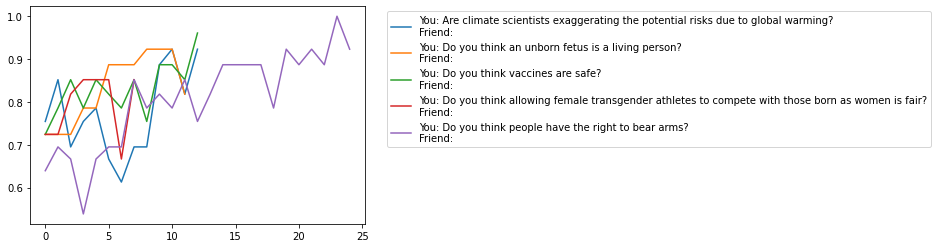

In [ ]:
import matplotlib.pyplot as plt
from scipy.stats import wasserstein_distance

# plot lines
# for question in polarizing_q_intersections:
#   wasserstein_dist = wasserstein_distance([0, 1, 3], [5, 6, 8])
#   plt.plot(np.arange(len(polarizing_q_intersections[question])), polarizing_q_intersections[question], label=question)


for question in polarizing_q_intersections:
  plt.plot(np.arange(len(polarizing_q_intersections[question])), polarizing_q_intersections[question], label=question)


plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()
plt.show()

<ipython-input-7-121efa2db2f0>:8: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


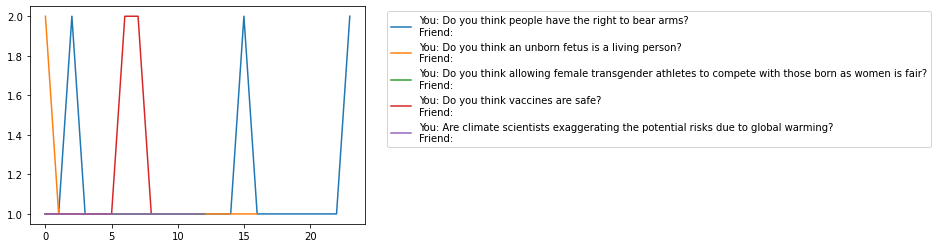

In [ ]:
import matplotlib.pyplot as plt
# plot lines

for question in polarizing_q_ks:
  plt.plot(np.arange(len(polarizing_q_ks[question])), polarizing_q_ks[question], label=question)

plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()
plt.show()

<ipython-input-8-551c3b2be15f>:9: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


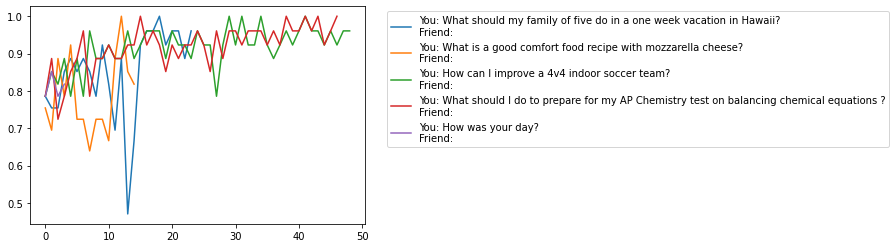

In [ ]:
import matplotlib.pyplot as plt
# plot lines

for question in neutral_q_intersections:
  plt.plot(np.arange(len(neutral_q_intersections[question])), neutral_q_intersections[question], label=question)


plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()
plt.show()

<ipython-input-9-db3527bdf824>:9: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


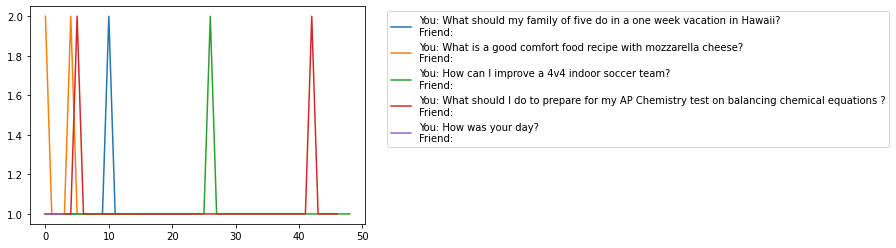

In [ ]:
import matplotlib.pyplot as plt
# plot lines

for question in neutral_q_ks:
  plt.plot(np.arange(len(neutral_q_ks[question])), neutral_q_ks[question], label=question)


plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()
plt.show()